# Bank Customer Churn Prediction Project

## Introduction
This project analyzes bank customer data to predict which customers are likely to leave the bank (churn). Customer churn is a critical metric for banks as acquiring new customers is typically more expensive than retaining existing ones. Through data analysis and machine learning, we aim to identify key factors leading to customer churn and build a predictive model.

## Data Overview
The dataset contains various features about bank customers, including demographic information (age, gender, country), account details (balance, credit score), and relationship information (tenure, products). Our target variable is 'churn', indicating whether a customer has left the bank (1) or remains a customer (0).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

: 

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

df = pd.read_csv("Bank Customer Churn Prediction.csv")
print("Preview of the first 5 rows:\n")
display(df.head().style.background_gradient(cmap='Blues', subset=['credit_score', 'age', 'balance']))
print("\nTarget Variable: 'churn' - Whether a customer has left the bank (1) or not (0)")

# Exploratory Data Analysis (EDA)

In [4]:
print(f"Dataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns\n")

# Display data types and check for missing values in a formatted way
data_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Missing Values': df.isnull().sum(),
    'Missing (%)': (df.isnull().sum() / len(df) * 100).round(2),
    'Unique Values': df.nunique()
})

print("Dataset Information:")
display(data_info)

# Enhanced statistical summary with more readable format
print("\nNumerical Features - Statistical Summary:")
num_summary = df.describe().T
num_summary['range'] = num_summary['max'] - num_summary['min']
num_summary['coefficient_of_variation'] = (num_summary['std'] / num_summary['mean']).round(2)
display(num_summary[['count', 'min', 'max', 'range', 'mean', 'std', 'coefficient_of_variation']])

# Categorical features summary
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Features - Value Counts:")
for col in cat_cols:
    print(f"\n{col.upper()}:")
    display(pd.DataFrame(df[col].value_counts()).style.background_gradient(cmap='Blues'))

Dataset dimensions: 10000 rows and 12 columns

Dataset Information:


,Data Type,Non-Null Count,Missing Values,Missing (%),Unique Values
customer_id,int64,10000,0,0.0,10000
credit_score,int64,10000,0,0.0,460
country,object,10000,0,0.0,3
gender,object,10000,0,0.0,2
age,int64,10000,0,0.0,70
tenure,int64,10000,0,0.0,11
balance,float64,10000,0,0.0,6382
products_number,int64,10000,0,0.0,4
credit_card,int64,10000,0,0.0,2
active_member,int64,10000,0,0.0,2



Numerical Features - Statistical Summary:


,count,min,max,range,mean,std,coefficient_of_variation
customer_id,10000.0,15565701.00,15815690.00,249989.00,1.569094e+07,71936.186123,0.00
credit_score,10000.0,350.00,850.00,500.00,6.505288e+02,96.653299,0.15
age,10000.0,18.00,92.00,74.00,3.892180e+01,10.487806,0.27
tenure,10000.0,0.00,10.00,10.00,5.012800e+00,2.892174,0.58
balance,10000.0,0.00,250898.09,250898.09,7.648589e+04,62397.405202,0.82
products_number,10000.0,1.00,4.00,3.00,1.530200e+00,0.581654,0.38
credit_card,10000.0,0.00,1.00,1.00,7.055000e-01,0.455840,0.65
active_member,10000.0,0.00,1.00,1.00,5.151000e-01,0.499797,0.97
estimated_salary,10000.0,11.58,199992.48,199980.90,1.000902e+05,57510.492818,0.57
churn,10000.0,0.00,1.00,1.00,2.037000e-01,0.402769,1.98



Categorical Features - Value Counts:

COUNTRY:


,count
country,
France,5014
Germany,2509
Spain,2477



GENDER:


,count
gender,
Male,5457
Female,4543


## Data Exploration Insights

<div style="background-color: #f5f5f5; padding: 15px; border-left: 5px solid #5c85d6; margin: 20px 0;">
<h3 style="color: #2c3e50;">Dataset Quality</h3>

The dataset is **complete** with no missing values across all 12 features. It contains records of 10,000 bank customers with a good balance of demographic and banking attributes.
</div>

<div style="background-color: #f5f5f5; padding: 15px; border-left: 5px solid #e74c3c; margin: 20px 0;">
<h3 style="color: #2c3e50;">Customer Demographics</h3>

- **Gender Distribution**: Slightly more male customers (54.6%) than female customers (45.4%)
- **Geographic Distribution**: Half of the customers (50.1%) are from France, with Germany (25.1%) and Spain (24.8%) having similar representation
- **Age Range**: Customers range from 18 to 92 years old, with an average age of about 39 years
</div>

<div style="background-color: #f5f5f5; padding: 15px; border-left: 5px solid #27ae60; margin: 20px 0;">
<h3 style="color: #2c3e50;">Banking Behaviors</h3>

- **Churn Rate**: 20.4% of customers have left the bank (churned)
- **Balance Variability**: Customer balances show high variability (coefficient of variation: 0.82), ranging from €0 to €250,898
- **Products Usage**: Most customers have 1-2 products, with very few having 3 or 4 products
- **Credit Card Ownership**: 70.6% of customers hold a credit card
- **Active Status**: Only 51.5% of customers are active members, suggesting engagement opportunities
</div>

<div style="background-color: #f5f5f5; padding: 15px; border-left: 5px solid #f39c12; margin: 20px 0;">
<h3 style="color: #2c3e50;">Key Observations</h3>

- The churn rate (20.4%) is significant enough to warrant attention from the bank
- High variation in customer balances and estimated salaries indicates diverse customer segments
- Most customers have relatively short tenure (average 5 years), suggesting potential loyalty challenges
- Credit scores show moderate variation (coefficient: 0.15), ranging from 350 to 850
</div>

# Target Variable Analysis

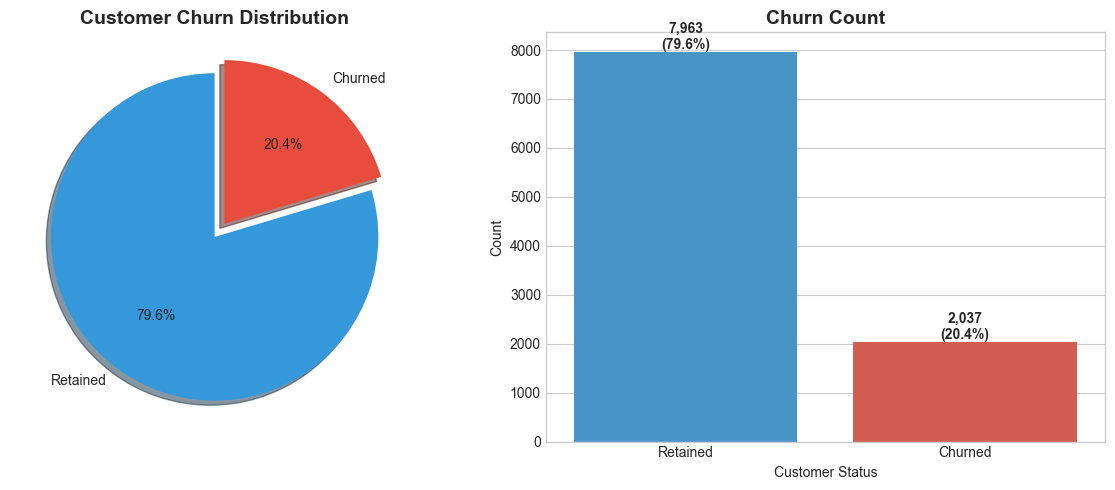


Churn Statistics:


,Status,Count,Percentage
0,Retained,7963,79.630000
1,Churned,2037,20.370000



Risk Assessment: A customer is 0.26 times more likely to stay than to churn.


In [5]:
# Create a custom colormap for better visualization
custom_colors = ["#3498db", "#e74c3c"]
custom_cmap = LinearSegmentedColormap.from_list("custom", custom_colors)

# Churn distribution analysis
plt.figure(figsize=(12, 5))

# Create a subplot with 1 row and 2 columns
plt.subplot(1, 2, 1)
churn_counts = df['churn'].value_counts()
labels = ['Retained', 'Churned']
explode = (0, 0.1)  # explode the 2nd slice (Churned)

plt.pie(churn_counts, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=custom_colors)
plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')

# Add a bar chart showing actual counts
plt.subplot(1, 2, 2)
sns.countplot(x='churn', data=df, palette=custom_colors)
plt.title('Churn Count', fontsize=14, fontweight='bold')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Retained', 'Churned'])

# Add count labels on top of bars
for i, count in enumerate(churn_counts.values):
    plt.annotate(f'{count:,}\n({count/len(df)*100:.1f}%)', 
                 (i, count), 
                 ha='center', va='bottom',
                 fontweight='bold')

plt.tight_layout()
plt.show()

# Add detailed churn statistics
churn_stats = pd.DataFrame({
    'Status': ['Retained', 'Churned'],
    'Count': churn_counts.values,
    'Percentage': (churn_counts.values / len(df) * 100).round(2)
})

print("\nChurn Statistics:")
display(churn_stats.style.background_gradient(cmap='Blues', subset=['Count', 'Percentage']))

# Calculate risk ratio
risk_ratio = (churn_counts[1] / len(df)) / (churn_counts[0] / len(df))
print(f"\nRisk Assessment: A customer is {risk_ratio:.2f} times more likely to stay than to churn.")

## Feature Analysis by Churn Status

In this section, we'll analyze how different customer characteristics relate to churn behavior. This will help identify key factors that might influence a customer's decision to leave the bank.

We'll examine both:
- **Demographic factors**: Age, gender, country
- **Banking behavior**: Credit score, balance, number of products, etc.

These insights will guide our modeling approach and help identify potential areas for intervention to reduce customer churn.

# Age Distribution Analysis

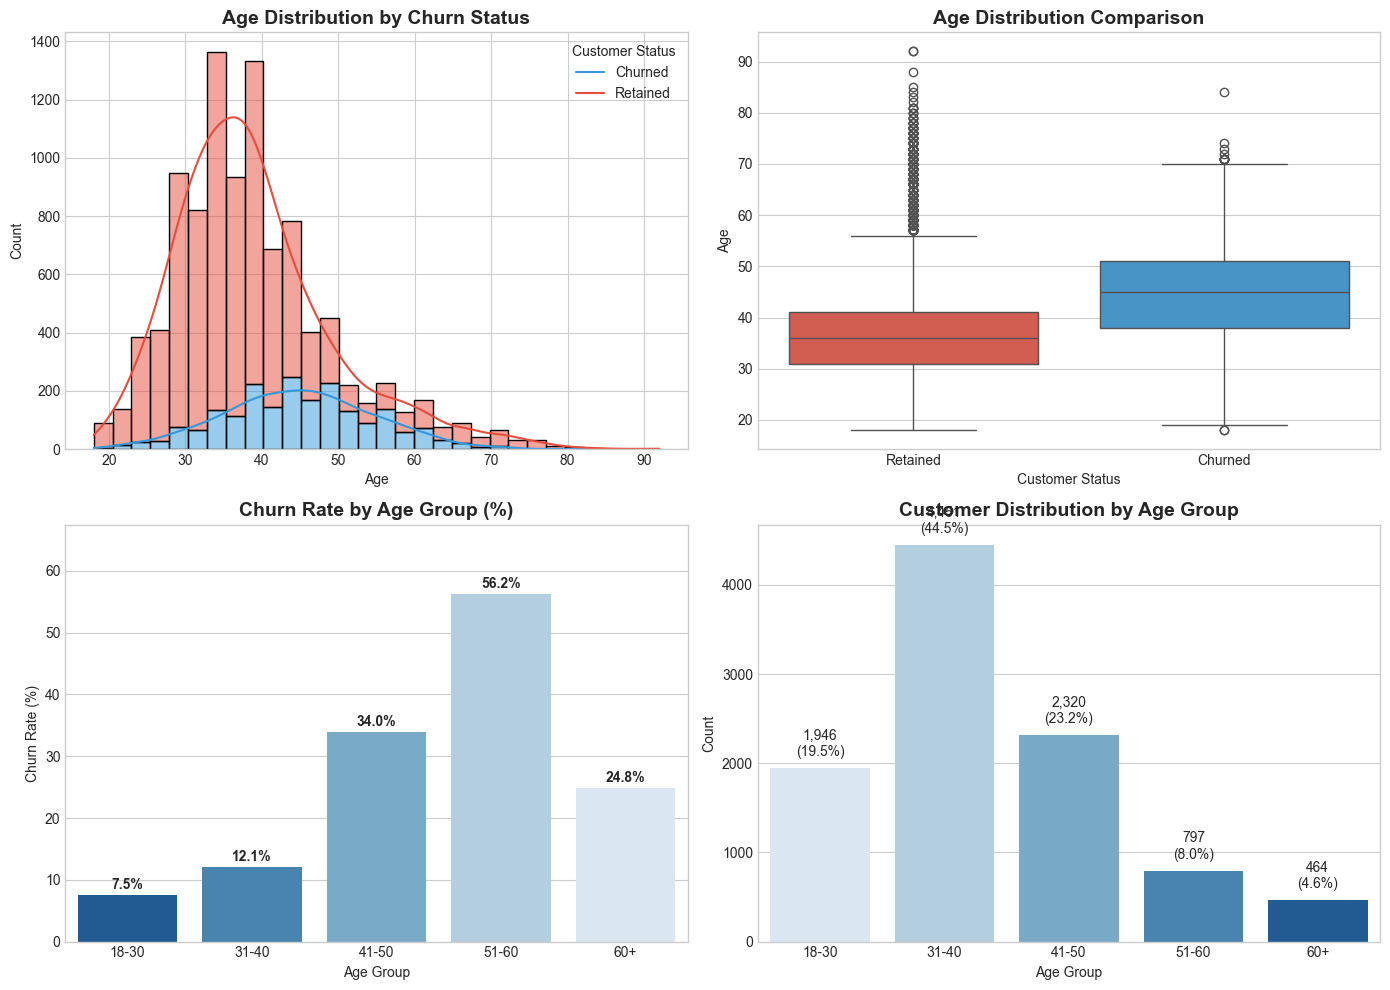

Correlation between Age and Churn: 0.2853

Average Age of Retained Customers: 37.41 years
Average Age of Churned Customers: 44.84 years
Age Difference: 7.43 years

Statistical test for age difference: p-value = 0.0000 (Significant at 5% level)


In [10]:
plt.figure(figsize=(14, 10))

# Create a custom colormap with reversed colors
custom_colors = ["#e74c3c", "#3498db"]  # Red for retained, Blue for churned

# Create a 2x2 subplot grid
plt.subplot(2, 2, 1)
# Enhanced histogram with KDE
sns.histplot(data=df, x='age', hue='churn', multiple='stack', 
             palette=custom_colors, kde=True, bins=30)
plt.title('Age Distribution by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Customer Status', labels=['Churned', 'Retained'])

# Add age boxplot by churn
plt.subplot(2, 2, 2)
sns.boxplot(x='churn', y='age', data=df, palette=custom_colors)
plt.title('Age Distribution Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Customer Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['Retained', 'Churned'])

# Age group analysis
plt.subplot(2, 2, 3)
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], 
                         labels=['18-30', '31-40', '41-50', '51-60', '60+'])
age_churn = df.groupby('age_group')['churn'].mean() * 100
sns.barplot(x=age_churn.index, y=age_churn.values, palette='Blues_r')
plt.title('Churn Rate by Age Group (%)', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, max(age_churn.values) * 1.2)  # Add some space above bars

# Add percentage labels on top of each bar
for i, rate in enumerate(age_churn):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center', fontweight='bold')

# Show count and percentage for each age group
plt.subplot(2, 2, 4)
age_counts = df['age_group'].value_counts().sort_index()
total = len(df)
age_pcts = (age_counts / total * 100).round(1)

# Create a table-like display
age_table = pd.DataFrame({
    'Count': age_counts,
    'Percentage (%)': age_pcts
})

sns.barplot(x=age_table.index, y=age_table['Count'], palette='Blues')
plt.title('Customer Distribution by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep labels horizontal

# Add count labels on each bar
for i, count in enumerate(age_counts):
    plt.text(i, count + 100, f'{count:,}\n({age_pcts.iloc[i]}%)', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate and display correlation between age and churn
age_corr = df['age'].corr(df['churn'])
print(f"Correlation between Age and Churn: {age_corr:.4f}")

# Calculate mean age for churned vs retained customers
age_by_churn = df.groupby('churn')['age'].mean()
print(f"\nAverage Age of Retained Customers: {age_by_churn[0]:.2f} years")
print(f"Average Age of Churned Customers: {age_by_churn[1]:.2f} years")
print(f"Age Difference: {abs(age_by_churn[0] - age_by_churn[1]):.2f} years")

# Statistical significance test for age difference
from scipy import stats
retained_ages = df[df['churn'] == 0]['age']
churned_ages = df[df['churn'] == 1]['age']
t_stat, p_value = stats.ttest_ind(retained_ages, churned_ages)
print(f"\nStatistical test for age difference: p-value = {p_value:.4f} " + 
      f"({'Significant' if p_value < 0.05 else 'Not significant'} at 5% level)")

## Credit Score Analysis

Credit score is a critical factor in banking relationships and can reflect a customer's financial reliability. In this section, we'll examine how credit scores relate to customer churn to understand:

- Whether customers with higher or lower credit scores are more likely to leave the bank
- If there are specific credit score ranges that show higher churn rates
- The overall distribution of credit scores among the bank's customers

This analysis may provide insights into risk profiles and help the bank develop targeted retention strategies.

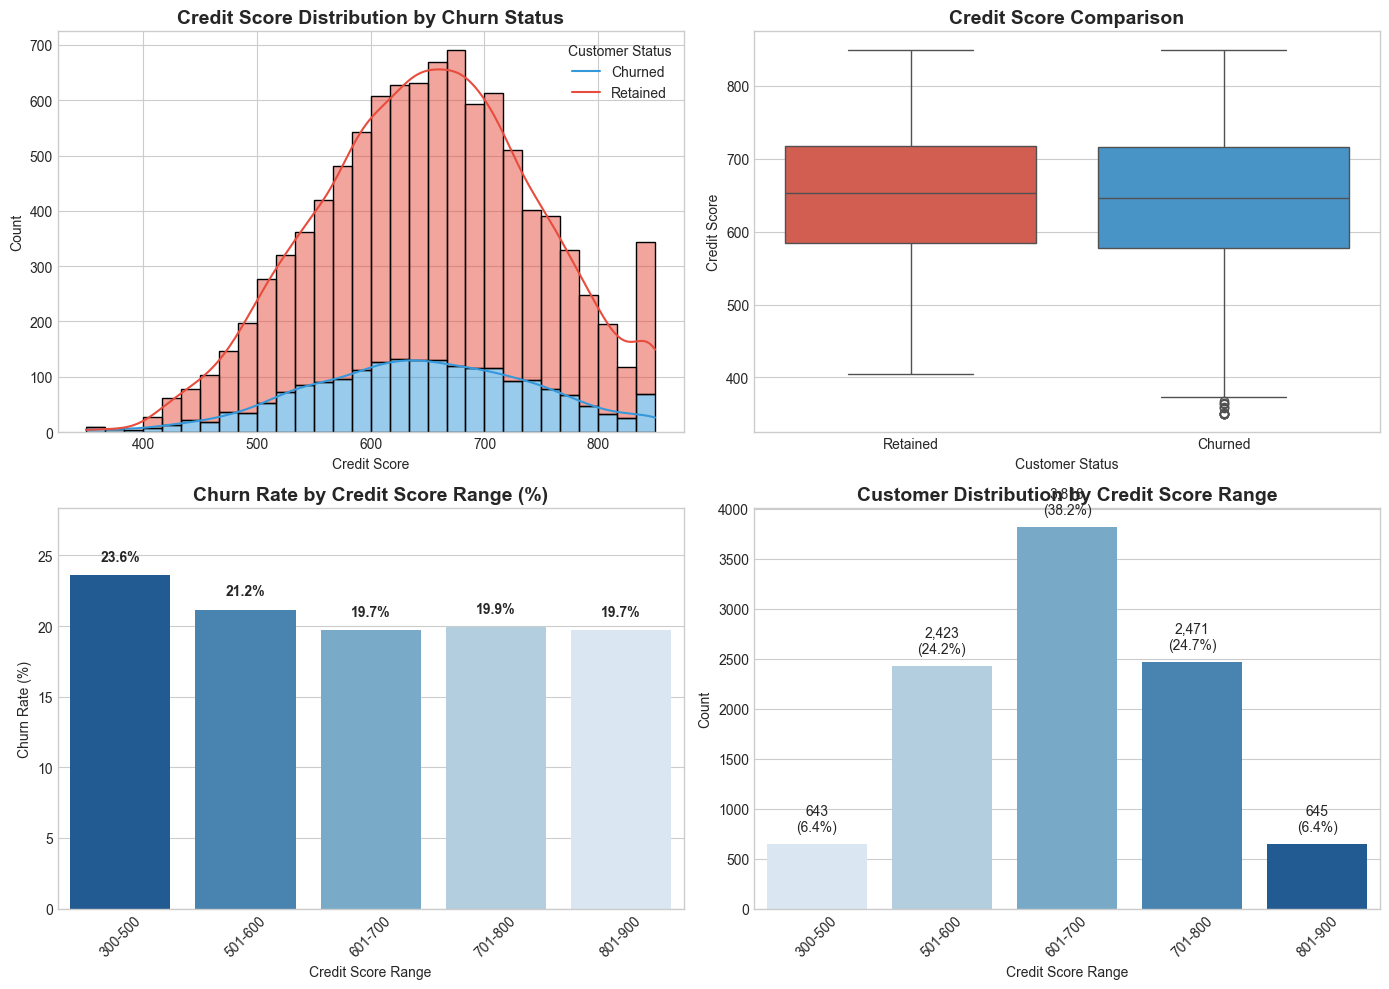

Correlation between Credit Score and Churn: -0.0271

Average Credit Score of Retained Customers: 651.85
Average Credit Score of Churned Customers: 645.35
Credit Score Difference: 6.50 points

Statistical test for credit score difference: p-value = 0.0067 (Significant at 5% level)


In [12]:
# Credit Score Analysis

plt.figure(figsize=(14, 10))

# Create 2x2 subplot grid
plt.subplot(2, 2, 1)
# Enhanced histogram with KDE
sns.histplot(data=df, x='credit_score', hue='churn', multiple='stack', 
             palette=custom_colors, kde=True, bins=30)
plt.title('Credit Score Distribution by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Customer Status', labels=['Churned', 'Retained'])

# Add credit score boxplot by churn
plt.subplot(2, 2, 2)
sns.boxplot(x='churn', y='credit_score', data=df, palette=custom_colors)
plt.title('Credit Score Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Customer Status')
plt.ylabel('Credit Score')
plt.xticks([0, 1], ['Retained', 'Churned'])

# Credit score group analysis
plt.subplot(2, 2, 3)
# Create credit score groups
df['credit_score_group'] = pd.cut(df['credit_score'], 
                                 bins=[300, 500, 600, 700, 800, 900], 
                                 labels=['300-500', '501-600', '601-700', '701-800', '801-900'])
credit_churn = df.groupby('credit_score_group')['churn'].mean() * 100
sns.barplot(x=credit_churn.index, y=credit_churn.values, palette='Blues_r')
plt.title('Churn Rate by Credit Score Range (%)', fontsize=14, fontweight='bold')
plt.xlabel('Credit Score Range')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, max(credit_churn.values) * 1.2)  # Add some space above bars
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for i, rate in enumerate(credit_churn):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center', fontweight='bold')

# Show count and percentage for each credit score group
plt.subplot(2, 2, 4)
score_counts = df['credit_score_group'].value_counts().sort_index()
total = len(df)
score_pcts = (score_counts / total * 100).round(1)

# Create a table-like display
score_table = pd.DataFrame({
    'Count': score_counts,
    'Percentage (%)': score_pcts
})

sns.barplot(x=score_table.index, y=score_table['Count'], palette='Blues')
plt.title('Customer Distribution by Credit Score Range', fontsize=14, fontweight='bold')
plt.xlabel('Credit Score Range')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count labels on each bar
for i, count in enumerate(score_counts):
    plt.text(i, count + 100, f'{count:,}\n({score_pcts.iloc[i]}%)', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate and display correlation between credit score and churn
score_corr = df['credit_score'].corr(df['churn'])
print(f"Correlation between Credit Score and Churn: {score_corr:.4f}")

# Calculate mean credit score for churned vs retained customers
score_by_churn = df.groupby('churn')['credit_score'].mean()
print(f"\nAverage Credit Score of Retained Customers: {score_by_churn[0]:.2f}")
print(f"Average Credit Score of Churned Customers: {score_by_churn[1]:.2f}")
print(f"Credit Score Difference: {abs(score_by_churn[0] - score_by_churn[1]):.2f} points")

# Statistical significance test for credit score difference
retained_scores = df[df['churn'] == 0]['credit_score']
churned_scores = df[df['churn'] == 1]['credit_score']
t_stat, p_value = stats.ttest_ind(retained_scores, churned_scores)
print(f"\nStatistical test for credit score difference: p-value = {p_value:.4f} " + 
      f"({'Significant' if p_value < 0.05 else 'Not significant'} at 5% level)")

# Key Feature Statistics Summary

In [16]:
# Key Statistics by Feature Type

# NUMERICAL FEATURES ANALYSIS
num_features = ['age', 'credit_score', 'balance', 'products_number', 'tenure', 'estimated_salary']

# Calculate statistics for numerical features
num_stats = pd.DataFrame(index=num_features)

# Add mean values for churned vs retained customers
for feature in num_features:
    num_stats.loc[feature, 'Retained Mean'] = df[df['churn']==0][feature].mean()
    num_stats.loc[feature, 'Churned Mean'] = df[df['churn']==1][feature].mean()
    num_stats.loc[feature, 'Mean Difference'] = num_stats.loc[feature, 'Churned Mean'] - num_stats.loc[feature, 'Retained Mean']
    num_stats.loc[feature, 'Correlation with Churn'] = df[feature].corr(df['churn'])
    
    # Run t-test for statistical significance
    t_stat, p_val = stats.ttest_ind(df[df['churn']==0][feature], df[df['churn']==1][feature])
    num_stats.loc[feature, 'p-value'] = p_val
    num_stats.loc[feature, 'Significant'] = 'Yes' if p_val < 0.05 else 'No'

# Round and format for display
num_stats = num_stats.round(2)

# Display numerical features with styling
print("NUMERICAL FEATURES ANALYSIS:")
display(num_stats.style
        .background_gradient(cmap='coolwarm', subset=['Correlation with Churn'])
        .background_gradient(cmap='RdYlGn_r', subset=['Mean Difference']))

# Generate numerical insights text
print("\nNumerical Features Insights:")
print("---------------------------")

# Age insight
age_diff = num_stats.loc['age', 'Mean Difference']
age_corr = num_stats.loc['age', 'Correlation with Churn']
print(f"• Age: Churned customers are on average {abs(age_diff):.1f} years {'older' if age_diff > 0 else 'younger'} " +
      f"than retained customers (correlation: {age_corr:.2f})")

# Credit score insight
cs_diff = num_stats.loc['credit_score', 'Mean Difference']
cs_corr = num_stats.loc['credit_score', 'Correlation with Churn']
print(f"• Credit Score: Churned customers have {abs(cs_diff):.1f} points {'higher' if cs_diff > 0 else 'lower'} " +
      f"credit scores than retained customers (correlation: {cs_corr:.2f})")

# Products insight
pn_diff = num_stats.loc['products_number', 'Mean Difference']
pn_corr = num_stats.loc['products_number', 'Correlation with Churn']
print(f"• Products: Churned customers have {abs(pn_diff):.1f} {'more' if pn_diff > 0 else 'fewer'} " +
      f"products than retained customers (correlation: {pn_corr:.2f})")

# CATEGORICAL FEATURES ANALYSIS
cat_features = ['gender', 'country', 'credit_card', 'active_member']

# Create dataframe for categorical statistics
cat_stats = pd.DataFrame(index=cat_features, 
                          columns=['Chi-Square', 'p-value', 'Cramer\'s V', 'Significant'])

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min(kcorr-1, rcorr-1))

# Calculate statistics for categorical features
for feature in cat_features:
    # Chi-square test of independence
    crosstab = pd.crosstab(df[feature], df['churn'])
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    
    # Calculate Cramer's V
    cramer = cramers_v(df[feature], df['churn'])
    
    # Store results
    cat_stats.loc[feature, 'Chi-Square'] = chi2
    cat_stats.loc[feature, 'p-value'] = p
    cat_stats.loc[feature, 'Cramer\'s V'] = cramer
    cat_stats.loc[feature, 'Significant'] = 'Yes' if p < 0.05 else 'No'

# Round and format for display
cat_stats = cat_stats.round(4)

# Display categorical features with styling
print("\nCATEGORICAL FEATURES ANALYSIS:")
display(cat_stats.style
        .background_gradient(cmap='Reds', subset=['Cramer\'s V'])
        .background_gradient(cmap='Blues_r', subset=['p-value']))

# Generate categorical insights
print("\nCategorical Features Insights:")
print("-----------------------------")

# Sort features by association strength
sorted_cat = cat_stats.sort_values('Cramer\'s V', ascending=False)
top_cats = sorted_cat.index.tolist()[:2]  # Top 2 categorical features

# Print top categorical features insights
for feature in top_cats:
    cramer = cat_stats.loc[feature, 'Cramer\'s V']
    sig = cat_stats.loc[feature, 'Significant']
    
    print(f"• {feature.capitalize()}: Association with churn = {cramer:.4f} " +
          f"({sig} statistically significant)")
    
    # Add distribution details
    counts = df.groupby([feature, 'churn']).size().unstack()
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    
    if feature in ['credit_card', 'active_member']:
        for val in [0, 1]:
            status = "Has" if val == 1 else "Doesn't have"
            if feature == 'credit_card':
                print(f"  - {status} credit card: {percentages[1][val]:.1f}% churn rate")
            else:
                print(f"  - {status} active membership: {percentages[1][val]:.1f}% churn rate")
    elif feature == 'gender':
        for gender in df['gender'].unique():
            print(f"  - {gender}: {percentages[1][gender]:.1f}% churn rate")
    elif feature == 'country':
        for country in df['country'].unique():
            print(f"  - {country}: {percentages[1][country]:.1f}% churn rate")

NUMERICAL FEATURES ANALYSIS:


,Retained Mean,Churned Mean,Mean Difference,Correlation with Churn,p-value,Significant
age,37.410000,44.840000,7.430000,0.290000,0.000000,Yes
credit_score,651.850000,645.350000,-6.500000,-0.030000,0.010000,Yes
balance,72745.300000,91108.540000,18363.240000,0.120000,0.000000,Yes
products_number,1.540000,1.480000,-0.070000,-0.050000,0.000000,Yes
tenure,5.030000,4.930000,-0.100000,-0.010000,0.160000,No
estimated_salary,99738.390000,101465.680000,1727.290000,0.010000,0.230000,No



Numerical Features Insights:
---------------------------
• Age: Churned customers are on average 7.4 years older than retained customers (correlation: 0.29)
• Credit Score: Churned customers have 6.5 points lower credit scores than retained customers (correlation: -0.03)
• Products: Churned customers have 0.1 fewer products than retained customers (correlation: -0.05)

CATEGORICAL FEATURES ANALYSIS:


,Chi-Square,p-value,Cramer's V,Significant
gender,112.918571,0.000000,0.105797,Yes
country,301.255337,0.000000,0.172999,Yes
credit_card,0.471338,0.492372,0.000000,No
active_member,242.985342,0.000000,0.155567,Yes



Categorical Features Insights:
-----------------------------
• Country: Association with churn = 0.1730 (Yes statistically significant)
  - France: 16.2% churn rate
  - Spain: 16.7% churn rate
  - Germany: 32.4% churn rate
• Active_member: Association with churn = 0.1556 (Yes statistically significant)
  - Doesn't have active membership: 26.9% churn rate
  - Has active membership: 14.3% churn rate


# Correlation Analysis - Separated by Feature Types

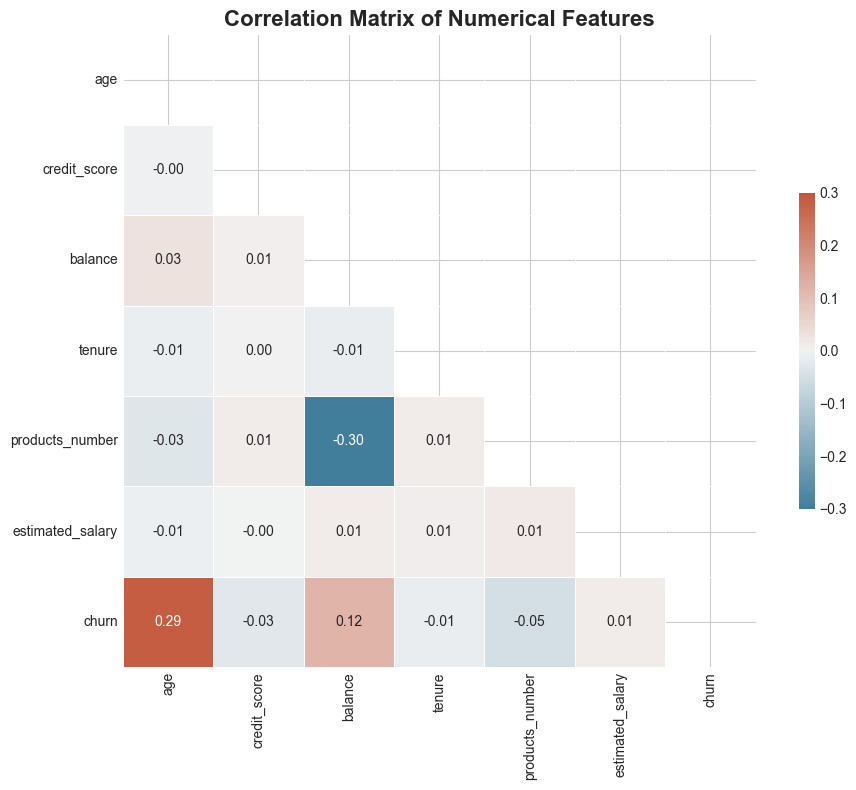


Numerical Features Correlation with Churn:
• age: 0.2853
• balance: 0.1185
• estimated_salary: 0.0121
• tenure: -0.0140
• credit_score: -0.0271
• products_number: -0.0478

Categorical Features Association with Churn:
• gender: 0.1058
• country: 0.1730
• credit_card: 0.0000
• active_member: 0.1556


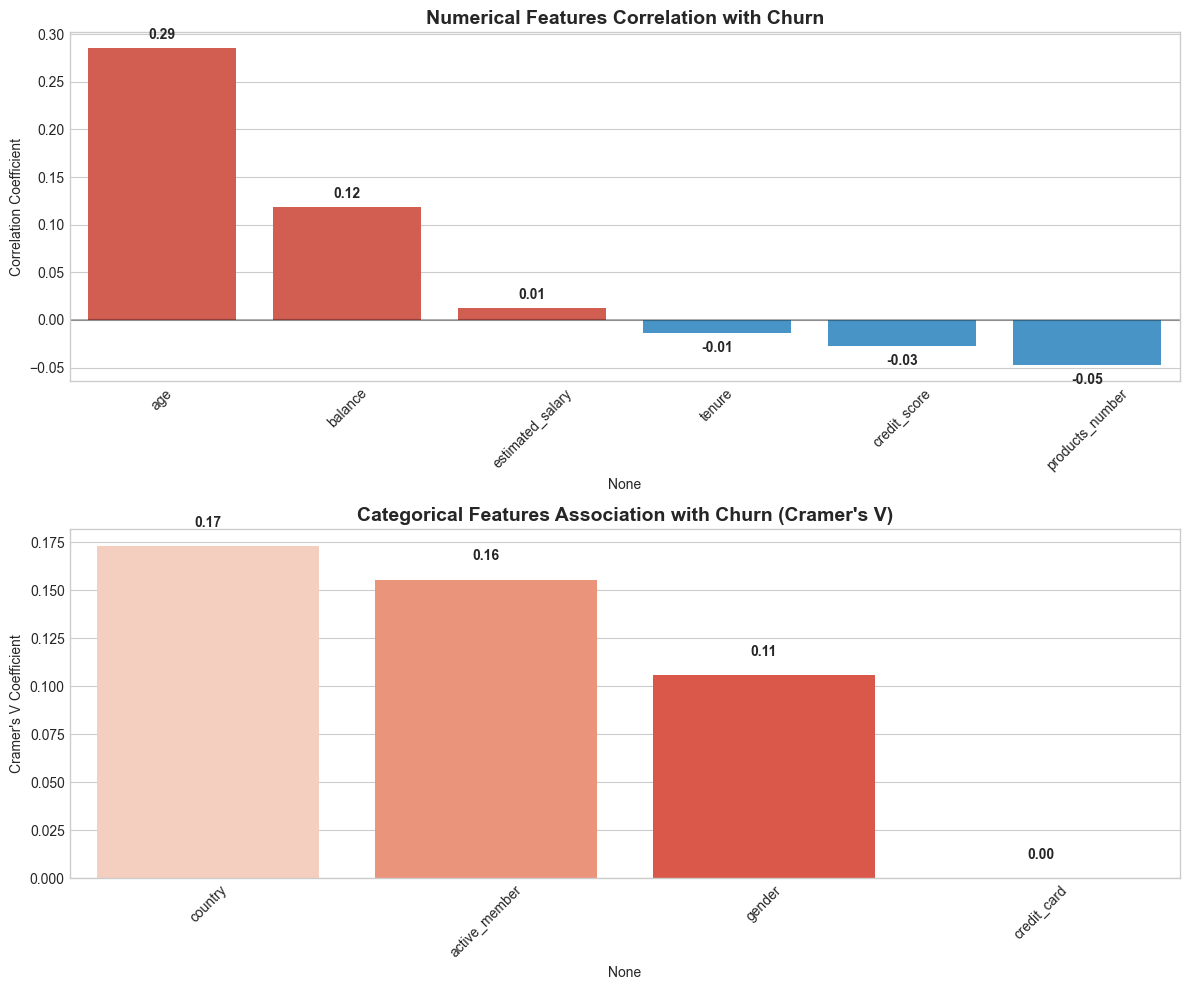


Correlation Insights:
--------------------
Numerical Features:
• Strongest numerical relationships with churn: age, balance

Categorical Features:
• Strongest categorical relationships with churn: gender, country, active_member


In [ ]:
# QUANTITATIVE FEATURES CORRELATION
# Select relevant numerical columns for correlation
num_columns = ['age', 'credit_score', 'balance', 'tenure', 
               'products_number', 'estimated_salary', 'churn']

# Calculate correlation matrix for numerical features
num_corr_matrix = df[num_columns].corr()

# Create plot for numerical correlations
plt.figure(figsize=(10, 8))
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(num_corr_matrix, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
sns.heatmap(num_corr_matrix, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Numerical features correlation with churn
print("\nNumerical Features Correlation with Churn:")
num_churn_corr = num_corr_matrix['churn'].drop('churn').sort_values(ascending=False)
for feature, corr in num_churn_corr.items():
    print(f"• {feature}: {corr:.4f}")

# CATEGORICAL FEATURES ASSOCIATION
# For categorical features, we'll use Cramer's V which is based on chi-square
print("\nCategorical Features Association with Churn:")

def cramers_v(x, y):
    """Calculate Cramer's V statistic for categorical-categorical association"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min(kcorr-1, rcorr-1))

# Create dummy variables for categorical features
cat_features = ['gender', 'country', 'credit_card', 'active_member']
cat_associations = {}

# Calculate and display association for each categorical feature
for feature in cat_features:
    association = cramers_v(df[feature], df['churn'])
    cat_associations[feature] = association
    print(f"• {feature}: {association:.4f}")

# Create bar plots to visualize associations
plt.figure(figsize=(12, 10))

# Plot for numerical correlations
plt.subplot(2, 1, 1)
colors = ['#e74c3c' if x > 0 else '#3498db' for x in num_churn_corr]
sns.barplot(x=num_churn_corr.index, y=num_churn_corr.values, palette=colors)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Numerical Features Correlation with Churn', fontsize=14, fontweight='bold')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)

# Add correlation values on top of each bar
for i, corr in enumerate(num_churn_corr):
    plt.text(i, corr + (0.01 if corr >= 0 else -0.02), 
             f'{corr:.2f}', ha='center', fontweight='bold')

# Plot for categorical associations
plt.subplot(2, 1, 2)
cat_series = pd.Series(cat_associations).sort_values(ascending=False)
sns.barplot(x=cat_series.index, y=cat_series.values, palette='Reds')
plt.title('Categorical Features Association with Churn (Cramer\'s V)', fontsize=14, fontweight='bold')
plt.ylabel('Cramer\'s V Coefficient')
plt.xticks(rotation=45)

# Add association values on top of each bar
for i, assoc in enumerate(cat_series):
    plt.text(i, assoc + 0.01, f'{assoc:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Generate insights text
print("\nCorrelation Insights:")
print("--------------------")
print("Numerical Features:")
strong_num = num_churn_corr[abs(num_churn_corr) > 0.1].index.tolist()
if strong_num:
    print(f"• Strongest numerical relationships with churn: {', '.join(strong_num)}")

print("\nCategorical Features:")
strong_cat = [f for f, v in cat_associations.items() if v > 0.1]
if strong_cat:
    print(f"• Strongest categorical relationships with churn: {', '.join(strong_cat)}")

## Feature Engineering and Model Preparation

Before building predictive models, we need to prepare our data by:

1. **Creating new features** that might provide additional insights
2. **Encoding categorical variables** to make them usable for machine learning algorithms
3. **Handling data scaling** to ensure all features contribute appropriately to the models
4. **Splitting the data** into training and testing sets

These steps will ensure our models can effectively learn from the data and generalize well to new observations.

# Feature Engineering and Data Preparation

In [17]:
# Create a copy of the dataframe for feature engineering
df_model = df.copy()

# 1. Feature Engineering - Create new features
print("Creating new features...")

# Age-related features
df_model['age_group'] = pd.cut(df_model['age'], 
                              bins=[18, 30, 40, 50, 60, 100], 
                              labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Balance-related features
df_model['has_balance'] = (df_model['balance'] > 0).astype(int)
df_model['balance_to_income_ratio'] = df_model['balance'] / df_model['estimated_salary']
# Handle division by zero or very small values
df_model['balance_to_income_ratio'] = df_model['balance_to_income_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Product-related features
df_model['is_active_with_cc'] = ((df_model['active_member'] == 1) & 
                                 (df_model['credit_card'] == 1)).astype(int)

# Tenure-related features
df_model['tenure_group'] = pd.cut(df_model['tenure'], 
                                 bins=[-1, 2, 5, 8, 20], 
                                 labels=['0-2 years', '3-5 years', '6-8 years', '9+ years'])

# 2. Encoding categorical variables
print("Encoding categorical variables...")

# Create dummy variables for categorical features
cat_features = ['gender', 'country']  # Original categorical features
cat_engineered = ['age_group', 'tenure_group']  # Newly created categorical features

# Use pandas get_dummies for one-hot encoding (with drop_first to avoid multicollinearity)
df_encoded = pd.get_dummies(df_model, columns=cat_features + cat_engineered, drop_first=True)

# 3. Define feature sets
print("Preparing feature sets...")

# Target variable
target = 'churn'

# Select features for modeling
# Exclude original features that were transformed and the target variable
exclude_cols = ['customer_id', 'churn']
feature_cols = [col for col in df_encoded.columns if col not in exclude_cols]

# Create the feature matrix and target vector
X = df_encoded[feature_cols]
y = df_encoded[target]

# Print the list of features used for modeling
print(f"\nNumber of features after engineering: {len(feature_cols)}")
print("\nFeatures included in the model:")
for i, feature in enumerate(feature_cols, 1):
    print(f"{i}. {feature}")

# 4. Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nData split complete:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# 5. Scale the numerical features
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()

# Apply scaling to the training set
X_train_scaled = X_train.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])

# Apply the same scaling to the test set
X_test_scaled = X_test.copy()
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

print(f"\nFeature scaling applied to {len(num_cols)} numerical features")

# 6. Check for class imbalance and calculate class weights
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass weights to address imbalance:")
print(class_weight_dict)

# Save the prepared datasets for modeling
print("\nData preparation complete. Ready for modeling.")

Creating new features...
Encoding categorical variables...
Preparing feature sets...

Number of features after engineering: 22

Features included in the model:
1. credit_score
2. age
3. tenure
4. balance
5. products_number
6. credit_card
7. active_member
8. estimated_salary
9. credit_score_group
10. has_balance
11. balance_to_income_ratio
12. is_active_with_cc
13. gender_Male
14. country_Germany
15. country_Spain
16. age_group_31-40
17. age_group_41-50
18. age_group_51-60
19. age_group_60+
20. tenure_group_3-5 years
21. tenure_group_6-8 years
22. tenure_group_9+ years

Data split complete:
Training set: 8000 samples (80.0%)
Testing set: 2000 samples (20.0%)

Feature scaling applied to 11 numerical features

Class distribution in training set:
churn
0    6370
1    1630
Name: count, dtype: int64

Class weights to address imbalance:
{0: np.float64(0.6279434850863422), 1: np.float64(2.4539877300613497)}

Data preparation complete. Ready for modeling.


# Bank Customer Churn Prediction Models

In this section, we'll build and evaluate several machine learning models to predict customer churn. We'll implement:

1. **Logistic Regression** - A simple, interpretable baseline model
2. **Random Forest** - A powerful ensemble method that can capture non-linear relationships
3. **XGBoost** - An optimized gradient boosting algorithm known for its performance
4. **Support Vector Machine** - Effective for finding optimal decision boundaries

For each model, we'll:
- Train with optimal hyperparameters
- Evaluate performance using multiple metrics
- Visualize results with ROC curves and confusion matrices
- Identify the most important features influencing churn

This comprehensive approach will help us find the best model for predicting customer churn and understand the key factors driving customer decisions.

# Bank Customer Churn Prediction Models

Implementing multiple machine learning models to predict customer churn with comprehensive evaluation

## Data Preprocessing
Converting categorical features to appropriate numerical formats...
Converting categorical column: credit_score_group
Converting boolean column: gender_Male
Converting boolean column: country_Germany
Converting boolean column: country_Spain
Converting boolean column: age_group_31-40
Converting boolean column: age_group_41-50
Converting boolean column: age_group_51-60
Converting boolean column: age_group_60+
Converting boolean column: tenure_group_3-5 years
Converting boolean column: tenure_group_6-8 years
Converting boolean column: tenure_group_9+ years

Data types after conversion:
float64    11
int64      10
int8        1
Name: count, dtype: int64

Class distribution: [6370 1630]
Class weights: {0: np.float64(0.6279434850863422), 1: np.float64(2.4539877300613497)}

## 1. Logistic Regression
Training Logistic Regression m

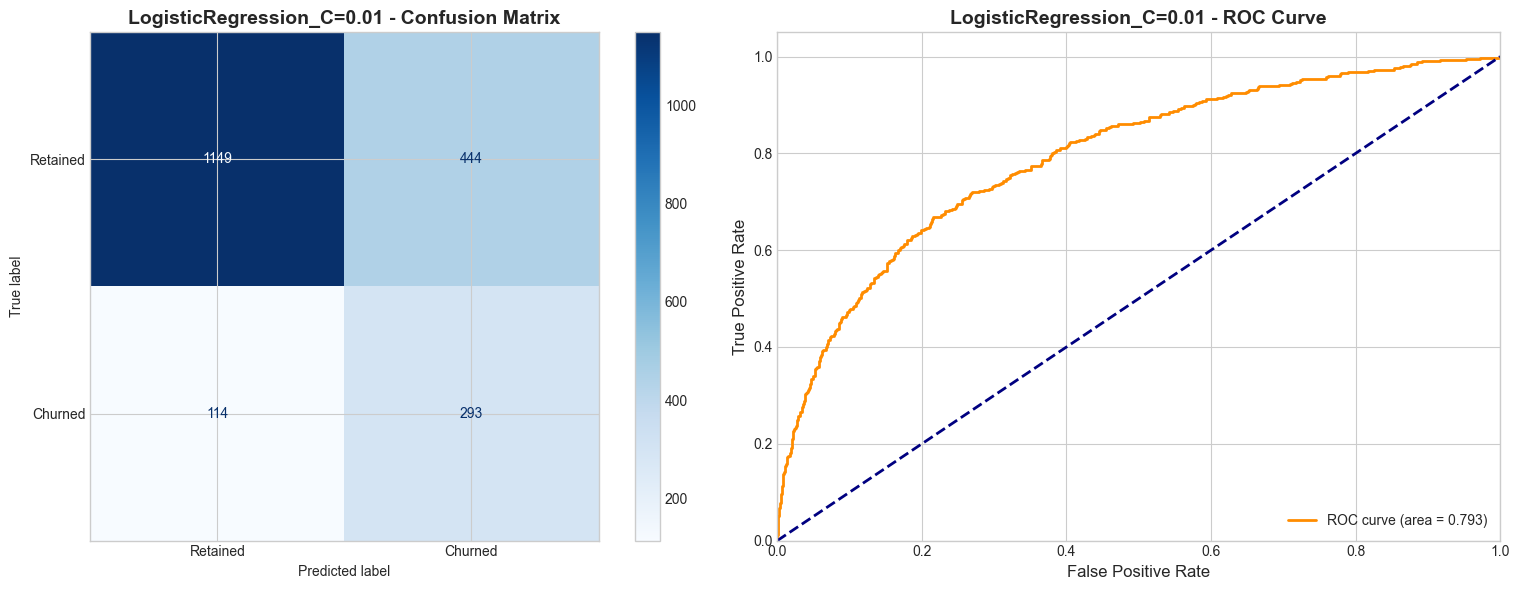


Training LogisticRegression_C=0.1...

-------------------- LogisticRegression_C=0.1 Evaluation --------------------
Accuracy: 0.7230
Precision: 0.3989
Recall: 0.7125
F1 Score: 0.5115
ROC AUC: 0.7950
Training Time: 0.03 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1593
           1       0.40      0.71      0.51       407

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.80      0.72      0.75      2000



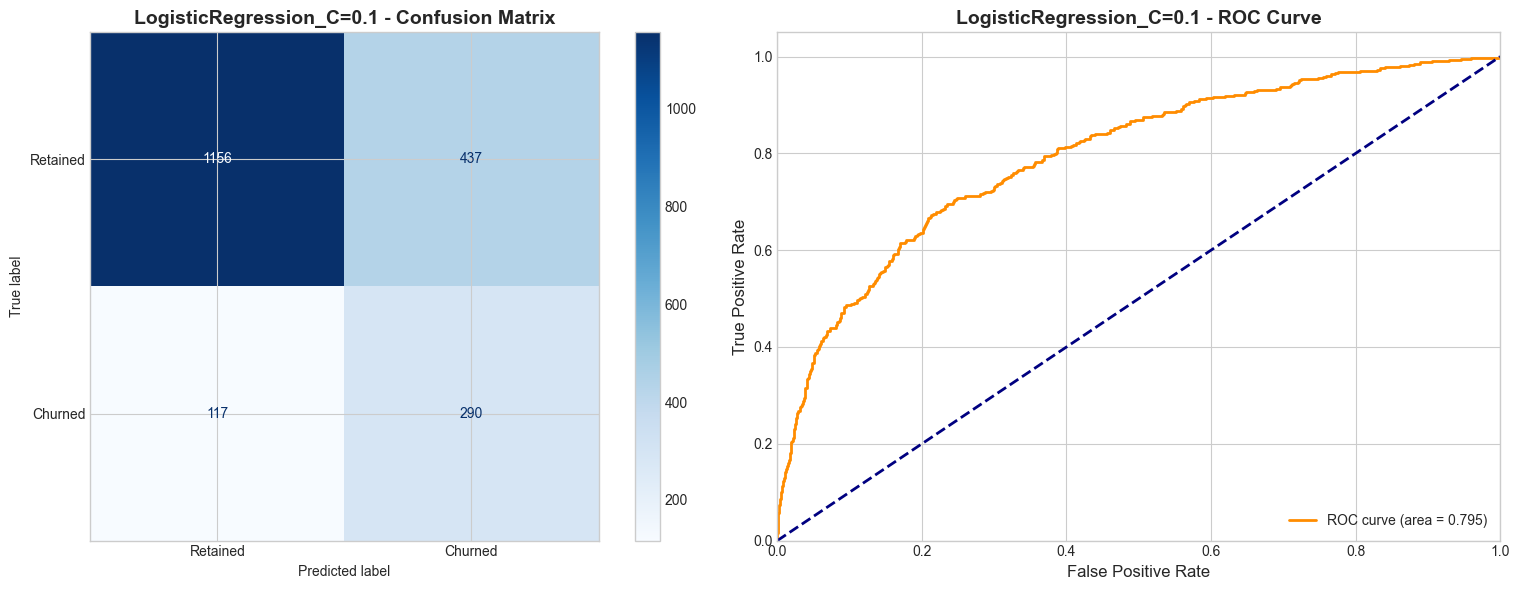


Training LogisticRegression_C=1.0...

-------------------- LogisticRegression_C=1.0 Evaluation --------------------
Accuracy: 0.7225
Precision: 0.3984
Recall: 0.7125
F1 Score: 0.5110
ROC AUC: 0.7944
Training Time: 0.04 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1593
           1       0.40      0.71      0.51       407

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.80      0.72      0.75      2000



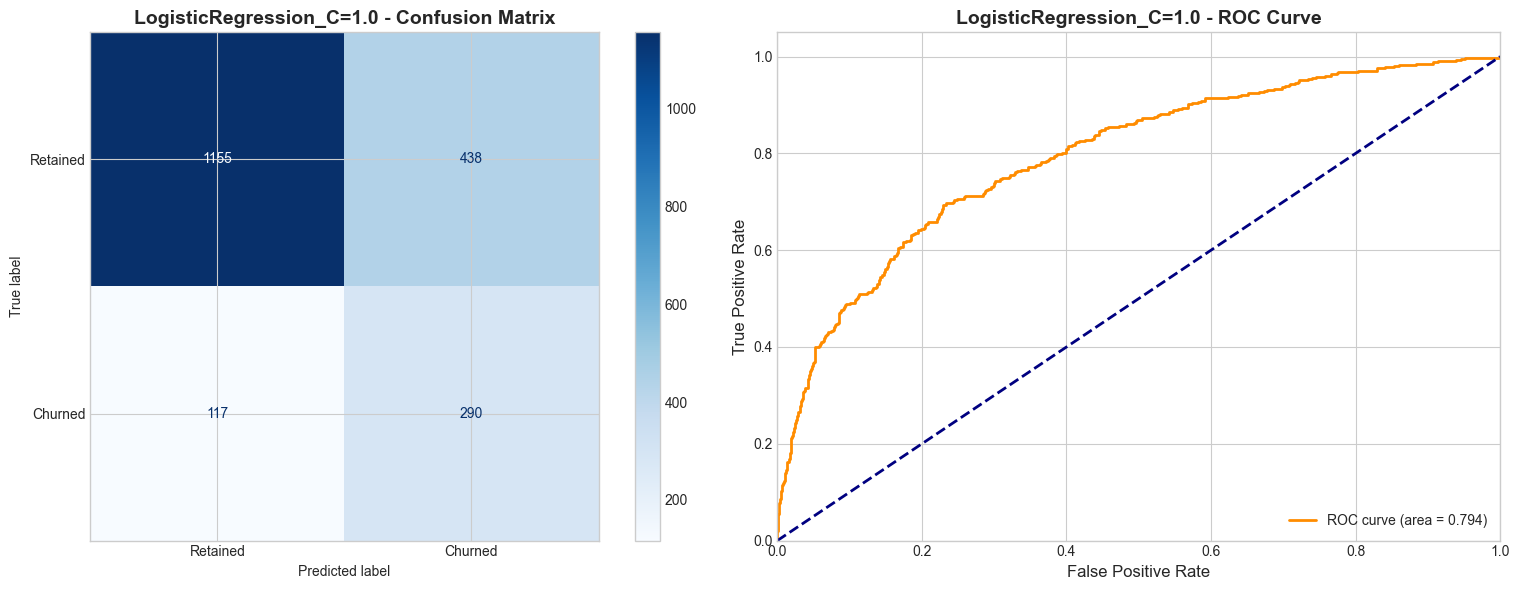


Training LogisticRegression_C=10.0...

-------------------- LogisticRegression_C=10.0 Evaluation --------------------
Accuracy: 0.7225
Precision: 0.3984
Recall: 0.7125
F1 Score: 0.5110
ROC AUC: 0.7942
Training Time: 0.05 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1593
           1       0.40      0.71      0.51       407

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.80      0.72      0.75      2000



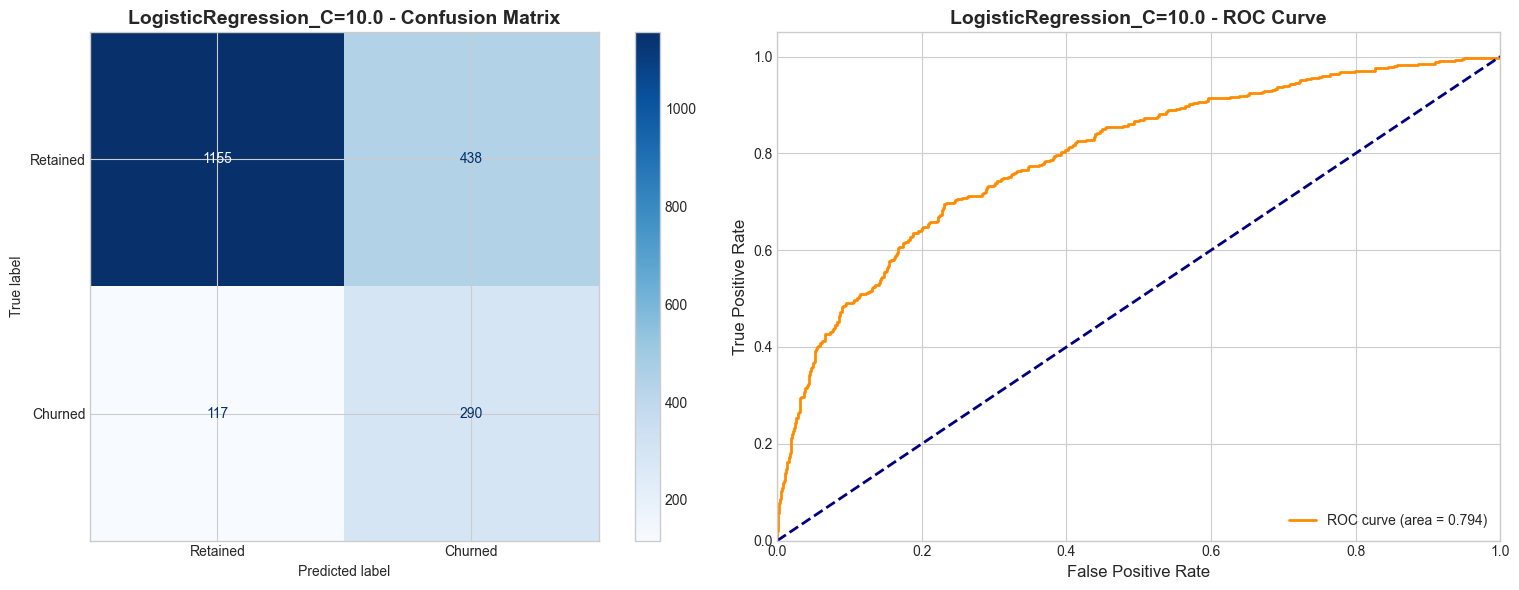


Best Logistic Regression: C=0.01, F1=0.5122

## 2. Random Forest
Training Random Forest models with different configurations...

Training RandomForest_n_est=100, max_depth=10...

-------------------- RandomForest_n_est=100, max_depth=10 Evaluation --------------------
Accuracy: 0.8355
Precision: 0.5886
Recall: 0.6364
F1 Score: 0.6116
ROC AUC: 0.8558
Training Time: 0.68 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.59      0.64      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.84      0.84      0.84      2000



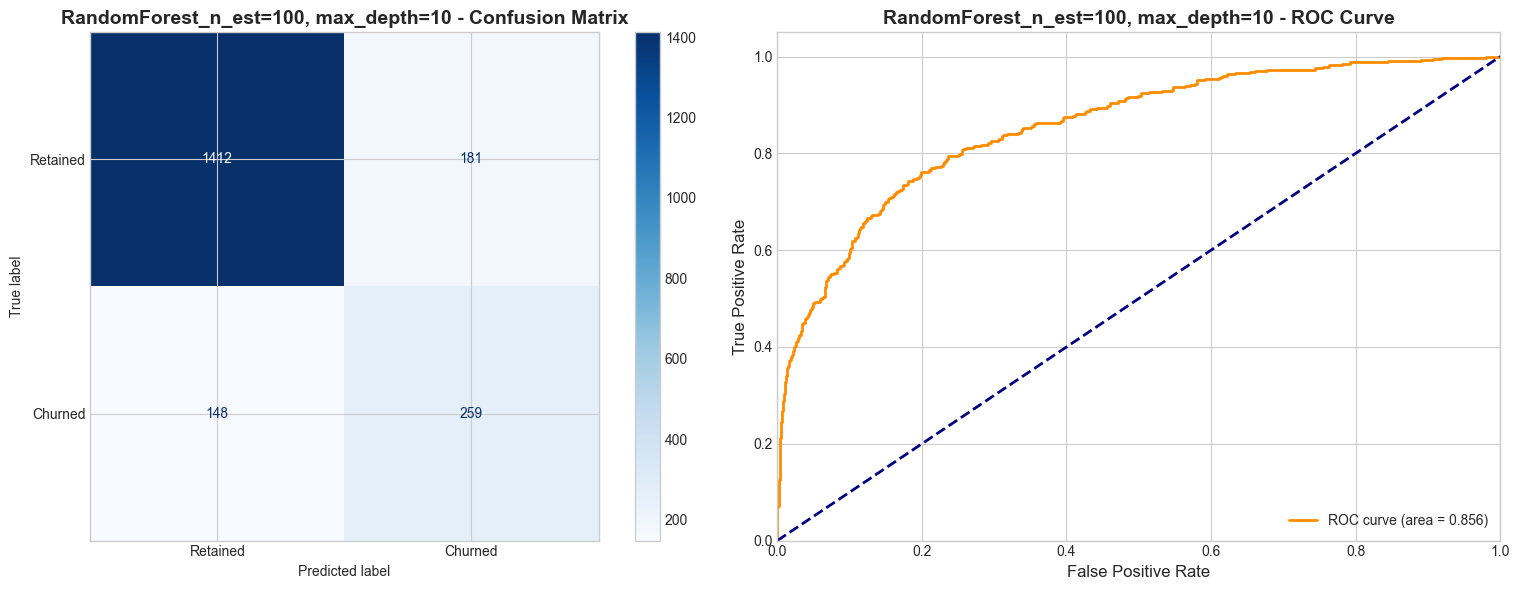


Training RandomForest_n_est=200, max_depth=10...

-------------------- RandomForest_n_est=200, max_depth=10 Evaluation --------------------
Accuracy: 0.8375
Precision: 0.5953
Recall: 0.6290
F1 Score: 0.6117
ROC AUC: 0.8580
Training Time: 1.37 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1593
           1       0.60      0.63      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.84      0.84      0.84      2000



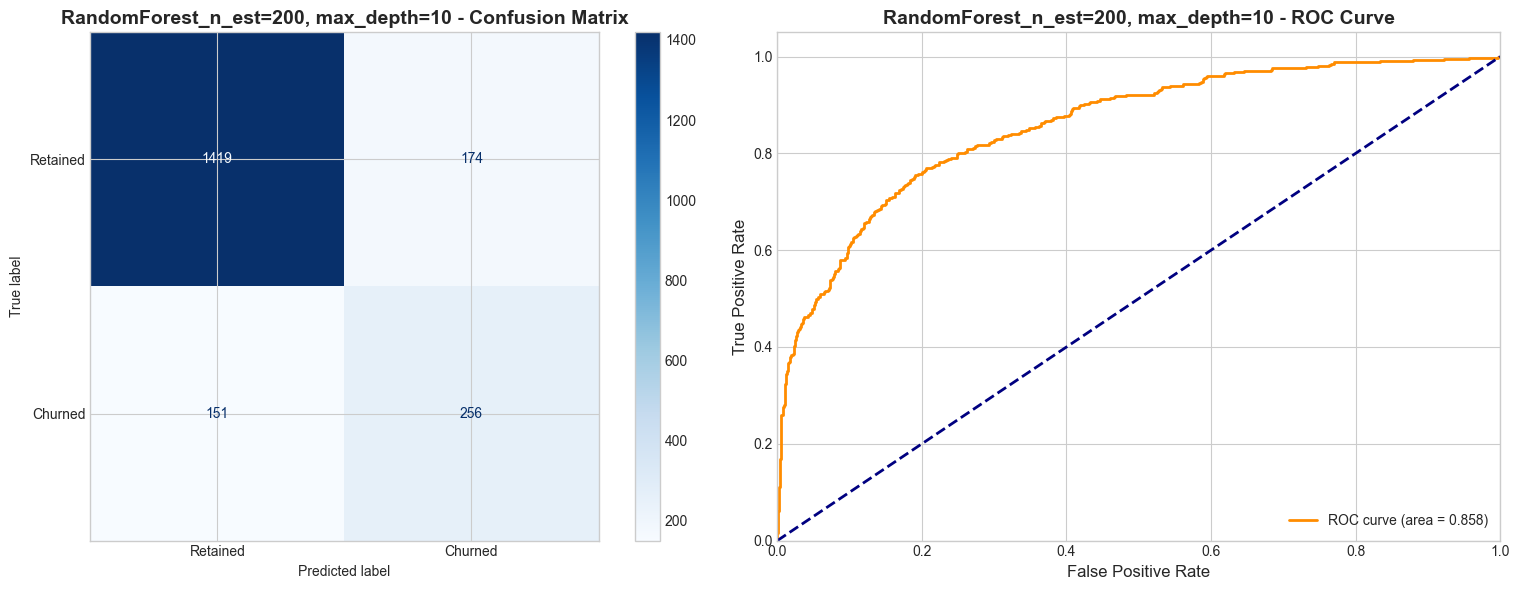


Training RandomForest_n_est=100, max_depth=None...

-------------------- RandomForest_n_est=100, max_depth=None Evaluation --------------------
Accuracy: 0.8635
Precision: 0.8073
Recall: 0.4324
F1 Score: 0.5632
ROC AUC: 0.8475
Training Time: 0.96 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.81      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



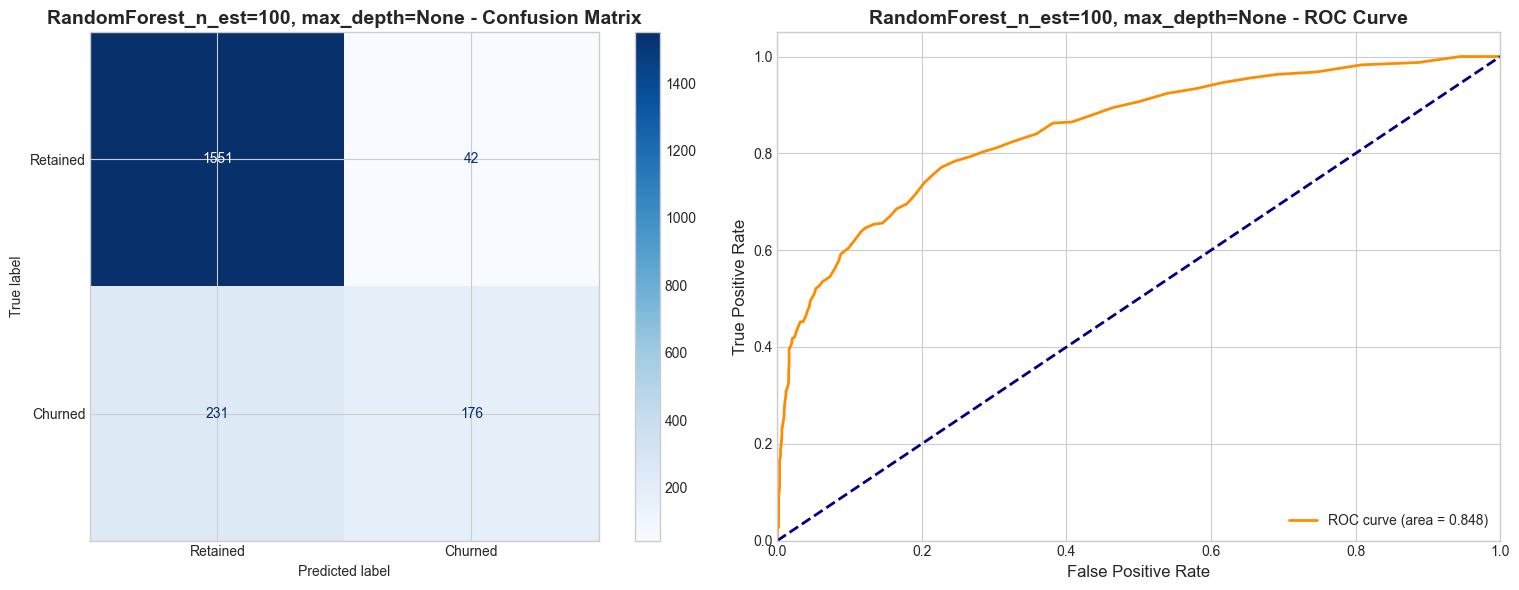


Training RandomForest_n_est=200, max_depth=None...

-------------------- RandomForest_n_est=200, max_depth=None Evaluation --------------------
Accuracy: 0.8625
Precision: 0.8084
Recall: 0.4251
F1 Score: 0.5572
ROC AUC: 0.8503
Training Time: 1.74 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.81      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



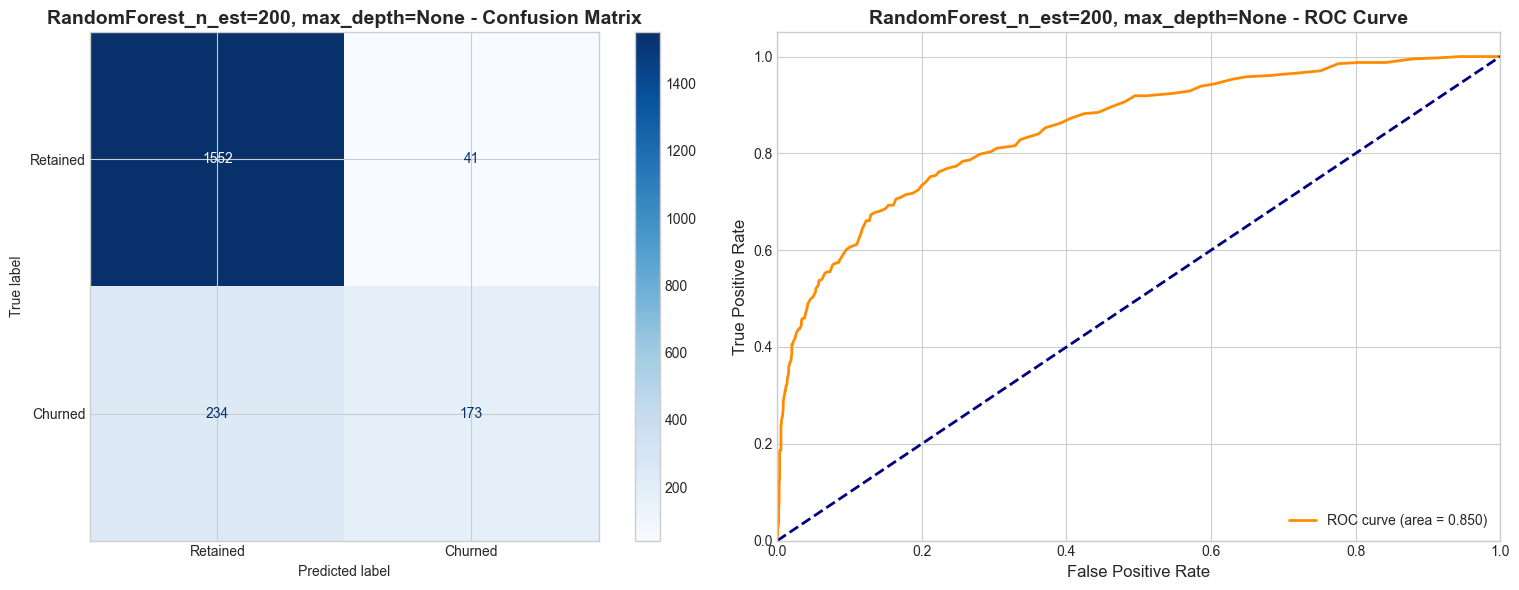


Best Random Forest: n_estimators=200, max_depth=10, F1=0.6117

## 3. XGBoost
Training XGBoost models with different configurations...

Training XGBoost_n_est=100, depth=3, lr=0.1...

-------------------- XGBoost_n_est=100, depth=3, lr=0.1 Evaluation --------------------
Accuracy: 0.7970
Precision: 0.5008
Recall: 0.7690
F1 Score: 0.6066
ROC AUC: 0.8697
Training Time: 0.24 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.50      0.77      0.61       407

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.73      2000
weighted avg       0.84      0.80      0.81      2000



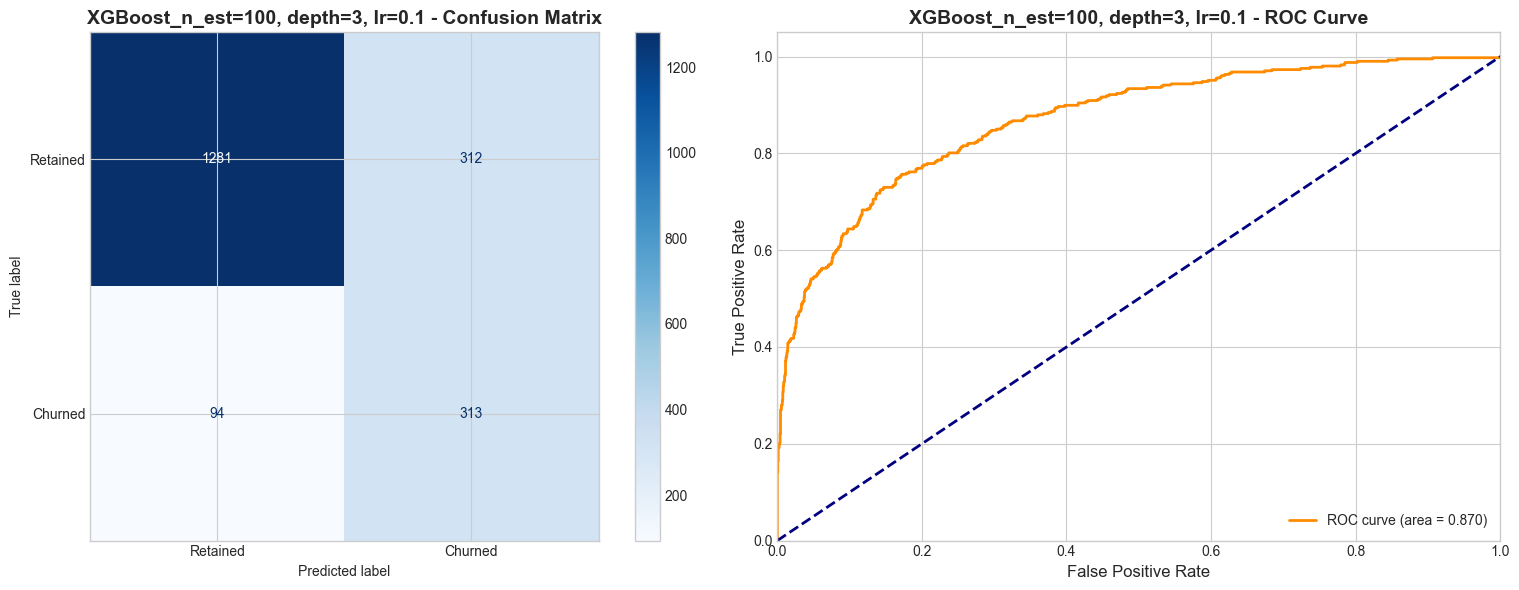


Training XGBoost_n_est=200, depth=3, lr=0.1...

-------------------- XGBoost_n_est=200, depth=3, lr=0.1 Evaluation --------------------
Accuracy: 0.8000
Precision: 0.5058
Recall: 0.7518
F1 Score: 0.6047
ROC AUC: 0.8663
Training Time: 0.13 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1593
           1       0.51      0.75      0.60       407

    accuracy                           0.80      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.80      0.81      2000



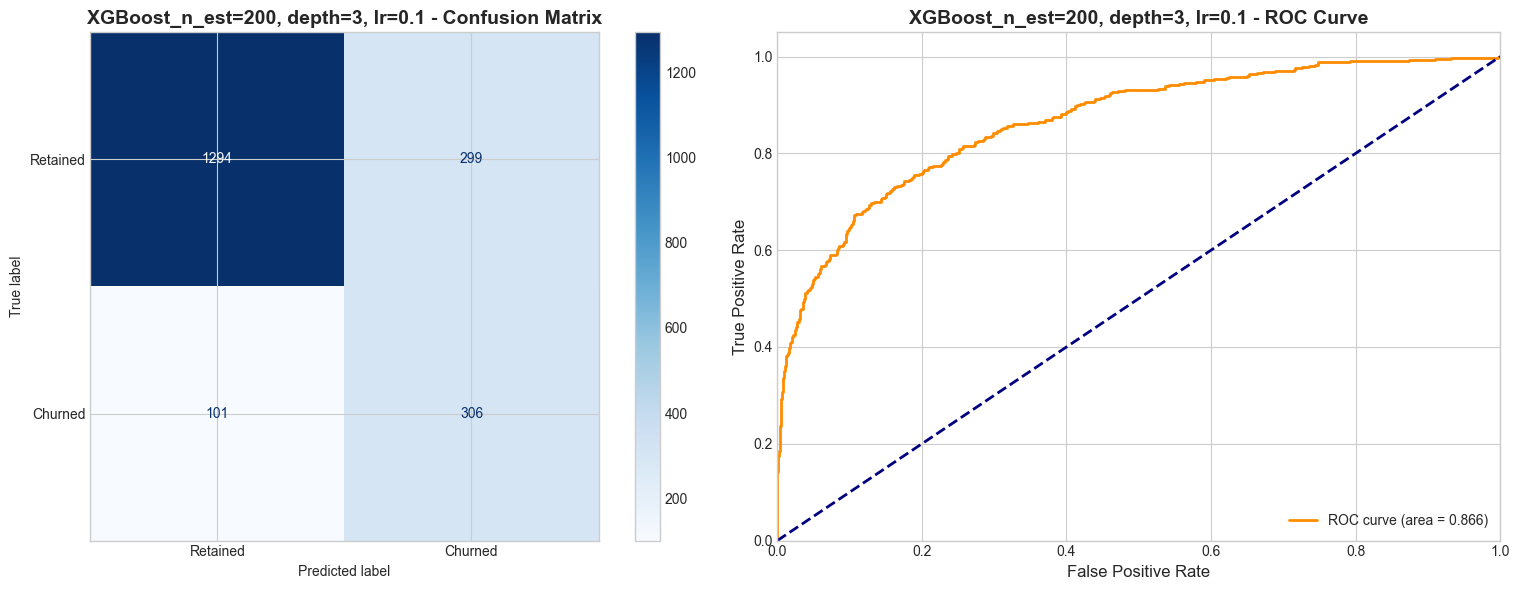


Training XGBoost_n_est=100, depth=5, lr=0.1...

-------------------- XGBoost_n_est=100, depth=5, lr=0.1 Evaluation --------------------
Accuracy: 0.8065
Precision: 0.5174
Recall: 0.7322
F1 Score: 0.6063
ROC AUC: 0.8647
Training Time: 0.11 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.52      0.73      0.61       407

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000



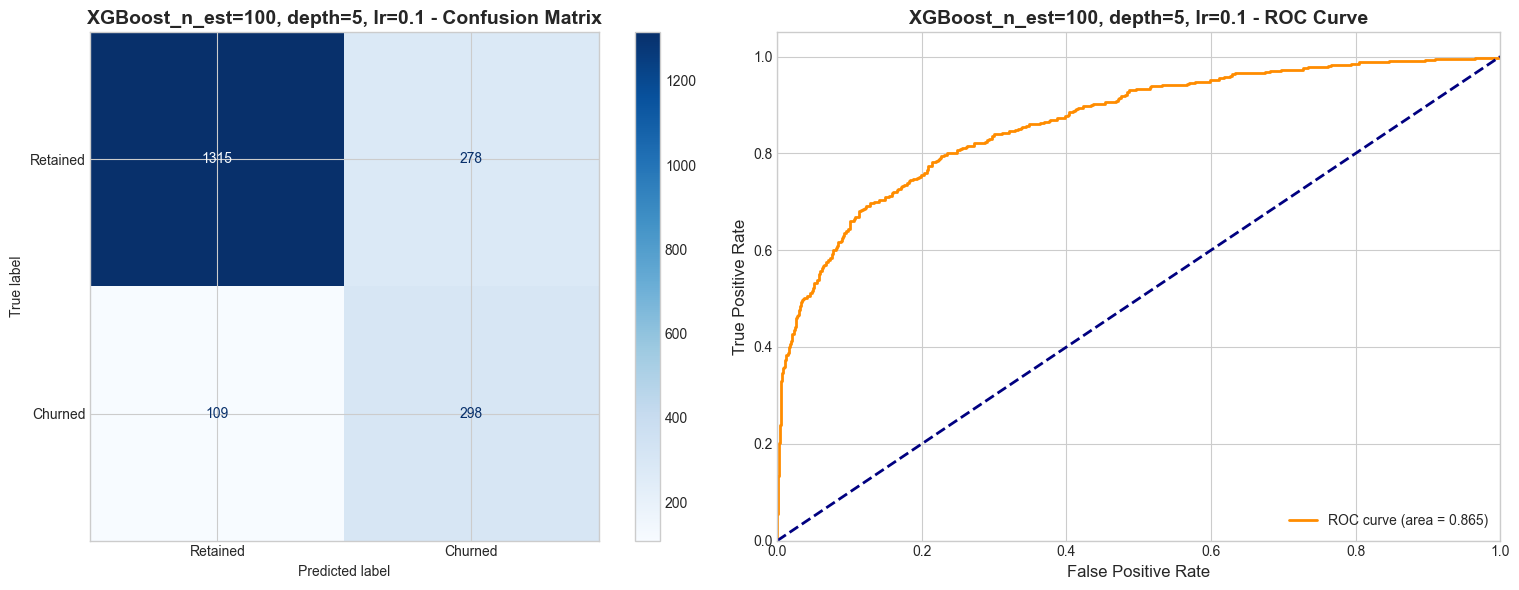


Training XGBoost_n_est=100, depth=3, lr=0.01...

-------------------- XGBoost_n_est=100, depth=3, lr=0.01 Evaluation --------------------
Accuracy: 0.7755
Precision: 0.4667
Recall: 0.7224
F1 Score: 0.5670
ROC AUC: 0.8373
Training Time: 0.09 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.72      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



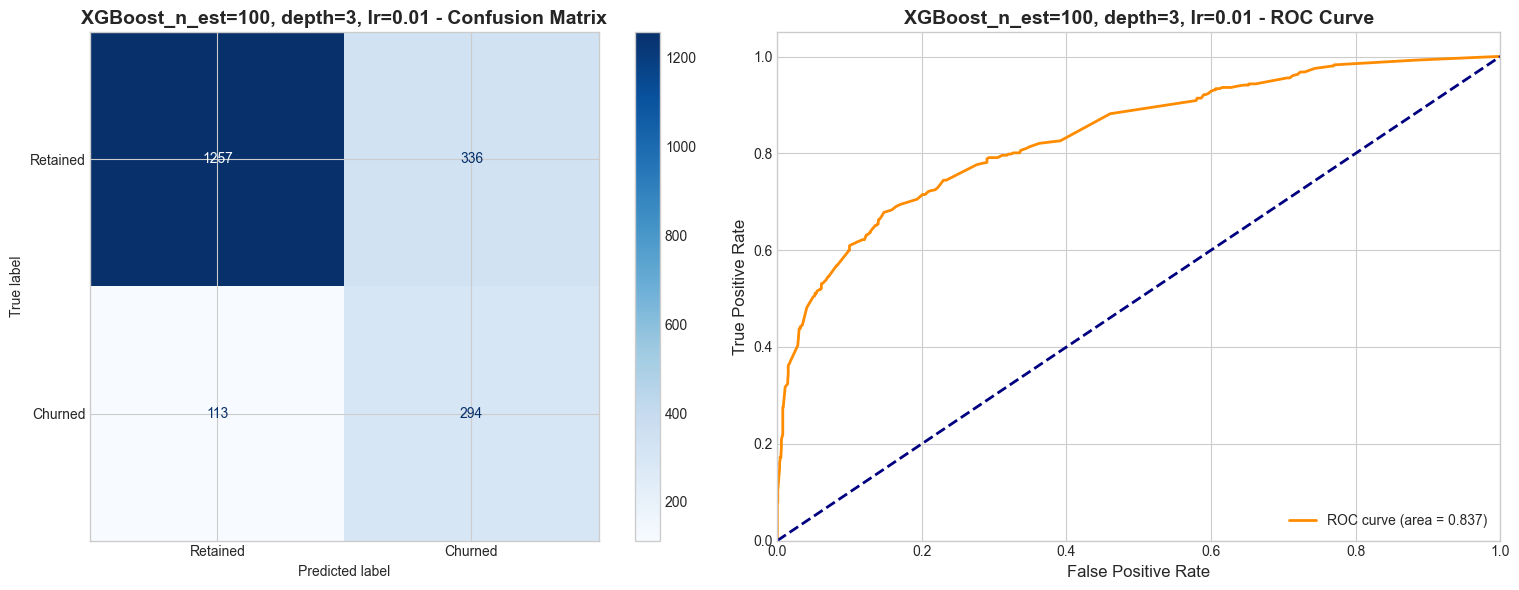


Best XGBoost: n_estimators=100, max_depth=3, learning_rate=0.1, F1=0.6066

## 4. Support Vector Machine
Training SVM model...

-------------------- SVM Evaluation --------------------
Accuracy: 0.7860
Precision: 0.4836
Recall: 0.7617
F1 Score: 0.5916
ROC AUC: 0.8532
Training Time: 10.36 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1593
           1       0.48      0.76      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.84      0.79      0.80      2000



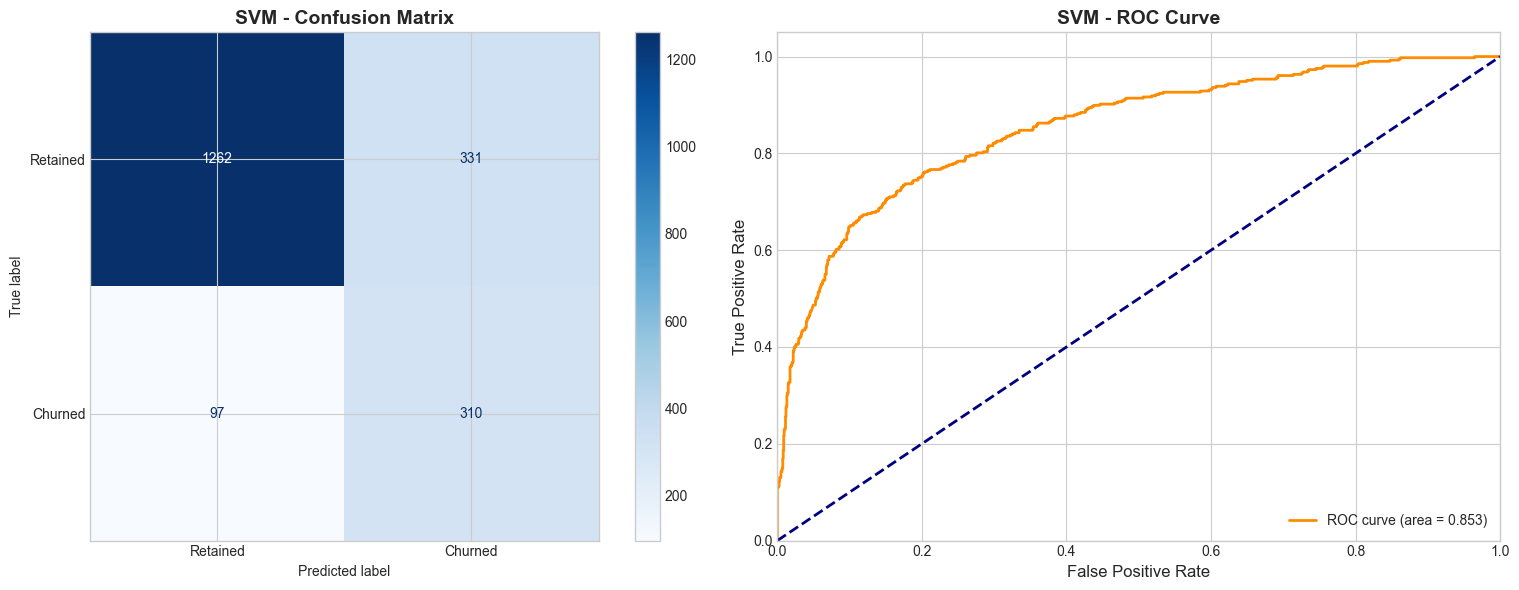


## Model Comparison

Model Performance Metrics:


,accuracy,precision,recall,f1,roc_auc,train_time
model_name,,,,,,
LogisticRegression_C=0.01,0.721000,0.397558,0.719902,0.512238,0.793181,0.03 sec
"RandomForest_n_est=200, max_depth=10",0.837500,0.595349,0.628993,0.611708,0.857991,1.37 sec
"XGBoost_n_est=100, depth=3, lr=0.1",0.797000,0.500800,0.769042,0.606589,0.869714,0.24 sec
SVM,0.786000,0.483619,0.761671,0.591603,0.853229,10.36 sec


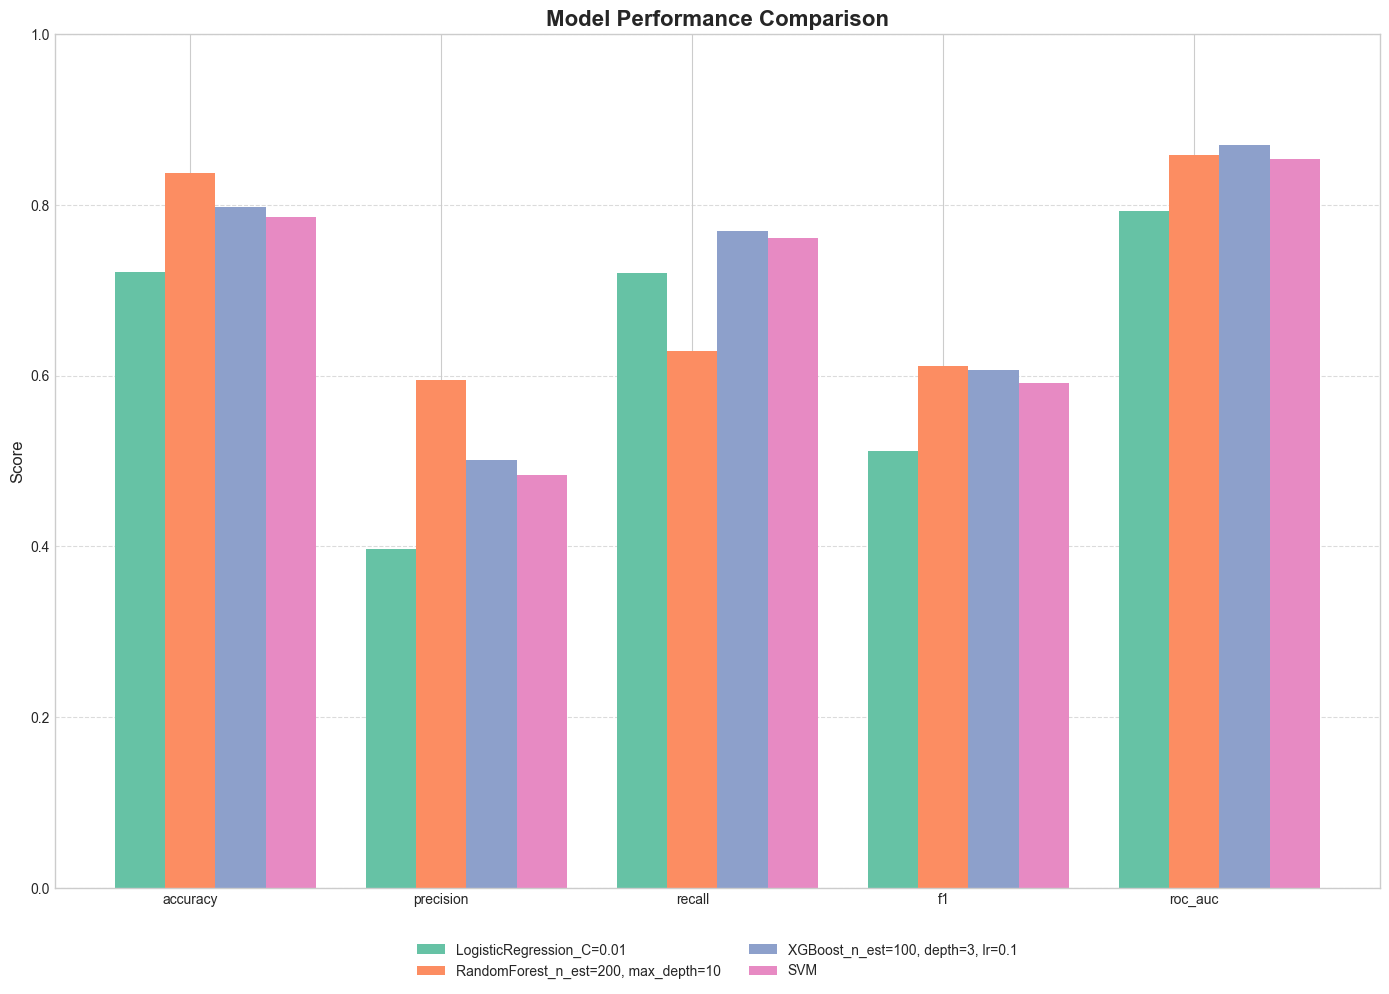


## Feature Importance Analysis
Analyzing feature importance for the best model: RandomForest_n_est=200, max_depth=10 (F1 = 0.6117)

Top 15 Most Important Features (Feature Importance):


,Feature,Importance
1,age,0.215682
4,products_number,0.175120
3,balance,0.072894
7,estimated_salary,0.065506
0,credit_score,0.062340
10,balance_to_income_ratio,0.058111
17,age_group_51-60,0.051964
13,country_Germany,0.039202
6,active_member,0.038062
2,tenure,0.034837


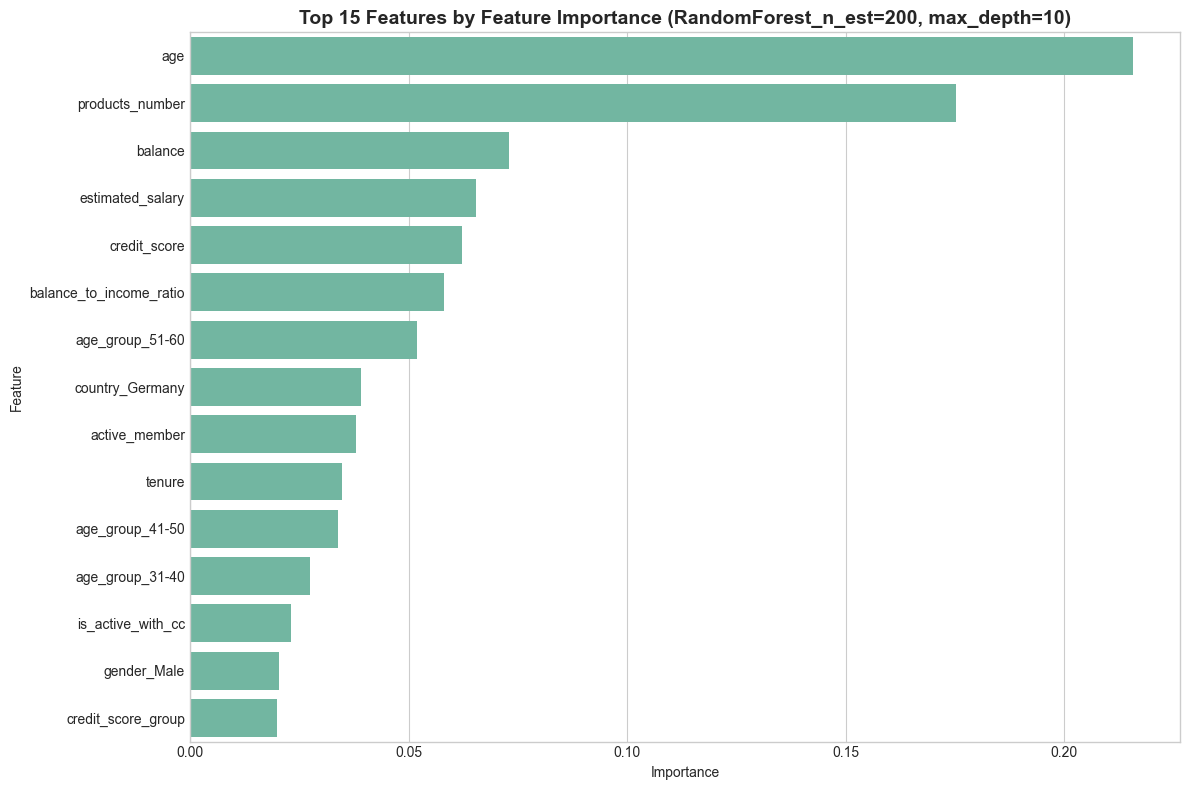


## Conclusion
The best performing model is RandomForest_n_est=200, max_depth=10 with an F1 score of 0.6117.
This model provides the best balance between precision and recall for predicting customer churn.

Key features driving customer churn prediction:
- age: 0.2157
- products_number: 0.1751
- balance: 0.0729
- estimated_salary: 0.0655
- credit_score: 0.0623


In [23]:
# Complete Bank Customer Churn Prediction Models - Fixed for Categorical Columns

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix, 
                             classification_report, ConfusionMatrixDisplay)

# Create a markdown cell for better presentation
print("# Bank Customer Churn Prediction Models")
print("\nImplementing multiple machine learning models to predict customer churn with comprehensive evaluation")

# First, fix the data types issue by creating proper numerical versions of the datasets
print("\n## Data Preprocessing")
print("Converting categorical features to appropriate numerical formats...")

# Create a copy of the dataframes to modify
X_train_model = X_train_scaled.copy()
X_test_model = X_test_scaled.copy()

# Convert categorical columns to numerical
for col in X_train_model.columns:
    if X_train_model[col].dtype == 'category':
        print(f"Converting categorical column: {col}")
        # Convert to string and then to a numeric code
        X_train_model[col] = X_train_model[col].astype(str).astype('category').cat.codes
        X_test_model[col] = X_test_model[col].astype(str).astype('category').cat.codes
    elif X_train_model[col].dtype == 'bool':
        print(f"Converting boolean column: {col}")
        X_train_model[col] = X_train_model[col].astype(int)
        X_test_model[col] = X_test_model[col].astype(int)

print("\nData types after conversion:")
print(X_train_model.dtypes.value_counts())

# Calculate class weights for handling imbalance
class_counts = np.bincount(y_train)
n_samples = len(y_train)
n_classes = len(class_counts)
weights = n_samples / (n_classes * class_counts)
class_weight_dict = {i: weight for i, weight in enumerate(weights)}

print(f"\nClass distribution: {class_counts}")
print(f"Class weights: {class_weight_dict}")

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate model performance with various metrics and visualizations"""
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # ROC AUC score if probability predictions are available
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Calculate training time
    train_time = time.time() - start_time
    
    # Display results
    print(f"\n{'-'*20} {model_name} Evaluation {'-'*20}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if roc_auc:
        print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Training Time: {train_time:.2f} seconds")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Create visualizations
    # Create a figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Retained', 'Churned'])
    disp.plot(ax=axes[0], cmap='Blues', values_format='d')
    axes[0].set_title(f'{model_name} - Confusion Matrix', fontsize=14, fontweight='bold')
    
    # ROC Curve if probability predictions are available
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        axes[1].plot(fpr, tpr, color='darkorange', lw=2, 
                 label=f'ROC curve (area = {roc_auc:.3f})')
        axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate', fontsize=12)
        axes[1].set_ylabel('True Positive Rate', fontsize=12)
        axes[1].set_title(f'{model_name} - ROC Curve', fontsize=14, fontweight='bold')
        axes[1].legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()
    
    # Return metrics dictionary
    metrics = {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc if roc_auc else 0,
        'train_time': train_time,
        'model': model  # Keep reference to the model
    }
    
    return metrics

# Storage for all model metrics
all_model_metrics = []

# 1. Logistic Regression
print("\n## 1. Logistic Regression")
print("Training Logistic Regression models with different regularization strengths...")

# Try different C values
c_values = [0.01, 0.1, 1.0, 10.0]
lr_metrics = []

for c in c_values:
    model_name = f"LogisticRegression_C={c}"
    print(f"\nTraining {model_name}...")
    
    # Create the model
    lr = LogisticRegression(
        C=c,
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    )
    
    # Evaluate
    metrics = evaluate_model(lr, X_train_model, X_test_model, y_train, y_test, model_name)
    lr_metrics.append(metrics)

# Find best Logistic Regression model
best_lr_metrics = max(lr_metrics, key=lambda x: x['f1'])
best_lr = best_lr_metrics['model']
print(f"\nBest Logistic Regression: C={best_lr.C}, F1={best_lr_metrics['f1']:.4f}")

all_model_metrics.append(best_lr_metrics)

# 2. Random Forest
print("\n## 2. Random Forest")
print("Training Random Forest models with different configurations...")

# Define different configurations to try
rf_configs = [
    {'n_estimators': 100, 'max_depth': 10, 'class_weight': 'balanced'},
    {'n_estimators': 200, 'max_depth': 10, 'class_weight': 'balanced'},
    {'n_estimators': 100, 'max_depth': None, 'class_weight': 'balanced'},
    {'n_estimators': 200, 'max_depth': None, 'class_weight': 'balanced'}
]

rf_metrics = []

for config in rf_configs:
    config_str = f"n_est={config['n_estimators']}, max_depth={config['max_depth']}"
    model_name = f"RandomForest_{config_str}"
    print(f"\nTraining {model_name}...")
    
    # Create the model
    rf = RandomForestClassifier(
        n_estimators=config['n_estimators'],
        max_depth=config['max_depth'],
        class_weight=config['class_weight'],
        random_state=42
    )
    
    # Evaluate
    metrics = evaluate_model(rf, X_train_model, X_test_model, y_train, y_test, model_name)
    rf_metrics.append(metrics)

# Find best Random Forest model
best_rf_metrics = max(rf_metrics, key=lambda x: x['f1'])
best_rf = best_rf_metrics['model']
print(f"\nBest Random Forest: n_estimators={best_rf.n_estimators}, max_depth={best_rf.max_depth}, F1={best_rf_metrics['f1']:.4f}")

all_model_metrics.append(best_rf_metrics)

# 3. XGBoost
print("\n## 3. XGBoost")
print("Training XGBoost models with different configurations...")

# Define different configurations to try
xgb_configs = [
    {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'scale_pos_weight': class_weight_dict[1]/class_weight_dict[0]},
    {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'scale_pos_weight': class_weight_dict[1]/class_weight_dict[0]},
    {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'scale_pos_weight': class_weight_dict[1]/class_weight_dict[0]},
    {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'scale_pos_weight': class_weight_dict[1]/class_weight_dict[0]}
]

xgb_metrics = []

for config in xgb_configs:
    config_str = f"n_est={config['n_estimators']}, depth={config['max_depth']}, lr={config['learning_rate']}"
    model_name = f"XGBoost_{config_str}"
    print(f"\nTraining {model_name}...")
    
    # Create the model
    xgb_model = xgb.XGBClassifier(
        n_estimators=config['n_estimators'],
        max_depth=config['max_depth'],
        learning_rate=config['learning_rate'],
        scale_pos_weight=config['scale_pos_weight'],
        objective='binary:logistic',
        random_state=42
    )
    
    # Evaluate
    metrics = evaluate_model(xgb_model, X_train_model, X_test_model, y_train, y_test, model_name)
    xgb_metrics.append(metrics)

# Find best XGBoost model
best_xgb_metrics = max(xgb_metrics, key=lambda x: x['f1'])
best_xgb = best_xgb_metrics['model']
print(f"\nBest XGBoost: n_estimators={best_xgb.n_estimators}, max_depth={best_xgb.max_depth}, "
      f"learning_rate={best_xgb.learning_rate}, F1={best_xgb_metrics['f1']:.4f}")

all_model_metrics.append(best_xgb_metrics)

# 4. SVM
print("\n## 4. Support Vector Machine")
print("Training SVM model...")

# SVM can be slow, so just try one configuration
svm_model = SVC(
    C=1.0,
    kernel='rbf',
    gamma='scale',
    class_weight='balanced',
    probability=True,
    random_state=42
)

svm_metrics = evaluate_model(svm_model, X_train_model, X_test_model, y_train, y_test, "SVM")
all_model_metrics.append(svm_metrics)

# Create a comparison of all models
print("\n## Model Comparison")
model_comparison = pd.DataFrame([
    {k: v for k, v in metrics.items() if k != 'model'} 
    for metrics in all_model_metrics
])
model_comparison = model_comparison.set_index('model_name')

# Display formatted model comparison
print("\nModel Performance Metrics:")
display(model_comparison[['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'train_time']]
        .style.background_gradient(cmap='Blues', subset=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
        .format({'train_time': '{:.2f} sec'})
       )

# Visualize model comparison
plt.figure(figsize=(14, 10))

# Plot key metrics for all models
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
x = np.arange(len(metrics_to_plot))
width = 0.2
multiplier = 0

for i, model_name in enumerate(model_comparison.index):
    offset = width * multiplier
    rects = plt.bar(x + offset, model_comparison.loc[model_name][metrics_to_plot], width, label=model_name)
    multiplier += 1

plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xticks(x + width, metrics_to_plot)
plt.ylim(0, 1.0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identify the best overall model based on F1 score
best_model_idx = model_comparison['f1'].idxmax()
best_f1 = model_comparison.loc[best_model_idx, 'f1']
best_model = next(m['model'] for m in all_model_metrics if m['model_name'] == best_model_idx)

print(f"\n## Feature Importance Analysis")
print(f"Analyzing feature importance for the best model: {best_model_idx} (F1 = {best_f1:.4f})")

# Get feature importance based on model type
if hasattr(best_model, 'feature_importances_'):
    # For tree-based models
    importances = best_model.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': X_train_model.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    importance_type = 'Feature Importance'
    
elif hasattr(best_model, 'coef_'):
    # For linear models
    coefficients = best_model.coef_[0]
    feature_importance = pd.DataFrame({
        'Feature': X_train_model.columns,
        'Importance': np.abs(coefficients)  # Use absolute values for importance
    }).sort_values('Importance', ascending=False)
    
    importance_type = 'Coefficient Magnitude'

else:
    # For models without direct feature importance
    print("This model type doesn't provide direct feature importance.")
    feature_importance = None
    importance_type = None

# Display and visualize feature importance if available
if feature_importance is not None:
    # Display top 15 features
    print(f"\nTop 15 Most Important Features ({importance_type}):")
    display(feature_importance.head(15))
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title(f'Top 15 Features by {importance_type} ({best_model_idx})', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("\n## Conclusion")
print(f"The best performing model is {best_model_idx} with an F1 score of {best_f1:.4f}.")
print("This model provides the best balance between precision and recall for predicting customer churn.")
print("\nKey features driving customer churn prediction:")

# List top 5 features if available
if feature_importance is not None:
    for idx, row in feature_importance.head(5).iterrows():
        print(f"- {row['Feature']}: {row['Importance']:.4f}")